https://www.kaggle.com/datasets/parisrohan/credit-score-classification?datasetId=2289007&sortBy=voteCount

In [ ]:
#importing important librarys
import numpy as np
import pandas as pd
import re
from skimpy import skim

import seaborn as sns
from  matplotlib import pyplot as plt
from scipy.stats import mode
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv(r"C:\Users\91779\OneDrive\Desktop\csv files\train.csv")
data.head(3)
customer=data["Customer_ID"]

C:\Users\91779\AppData\Local\Temp\ipykernel_22708\2441995137.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"C:\Users\91779\OneDrive\Desktop\csv files\train.csv")


            PROBLEM STATEMENT : NEED TO GET BUSINESS ORIENTED DATA ANALYIS AND TO BUILD A INTELLIGENT SYSTEM TO SEGREGATE THE PEOPLE INTO CREDIT SCORE BRACKETS TO REDUCE
            THE MANUAL EFFORTS REQUIRED BEST MODEL FOR PREDICTION WITHOUT ANY BIAS

    DOMANI KNOWLEDGE: IT'S A BANK DATA SET WHERE A DATA SCIENTIST NEEDS TO PREDICT THE
    CREDIT SCORE OF THE CUSTOMERS WITH THE HELP OF THE FINICAL CONDITION OF THE CUSTOMER AND THE FACTORS EFFECTING THE CREDICT SCORE.

About data ((100000 records with  28 Features )

## PRIMARY FACTORS :

#### Payment History:

----------This is the most significant factor affecting your credit score. It considers whether you have paid your bills on time, including credit cards, loans, mortgages, and other debts. Consistently making payments by the due date helps build a positive credit history.

#### Credit Utilization:

-----------This factor looks at the amount of credit you are currently using compared to your total available credit. It is recommended to keep your credit utilization ratio below 30% to maintain a good credit score. Lower utilization indicates responsible credit management.

#### Credit History Length:

----------------The length of your credit history plays a role in determining your credit score. A longer credit history allows credit bureaus to assess your payment patterns and behavior over time, giving them a better understanding of your creditworthiness.

#### Credit Mix:

-------------Having a mix of different types of credit, such as credit cards, loans, and mortgages, can positively impact your credit score. It demonstrates your ability to manage various forms of credit responsibly.

#### Outstanding debt:
---------Refers to the amount of money that you owe on your credit accounts or loans. It represents the balance that is still outstanding and needs to be repaid to the lenders or creditors. Here are some important points to understand about outstanding debt:

Types of Debt: Outstanding debt can include various types of credit accounts such as credit cards, personal loans, student loans, auto loans, mortgages, and lines of credit. Each type of debt may have different interest rates, repayment terms, and consequences for non-payment.

#### Payment behavior :
-----------------High spending on small value payments refers to a situation where an individual consistently spends a significant amount of money on small purchases or transactions,

Low spending on large value payments refers to a situation where an individual spends relatively small amounts of money on significant purchases or transactions.


#### SSN:

---------stands for Social Security Number. It is a unique nine-digit identification number issued to citizens, permanent residents, and temporary residents in the United States.



Age: Represents the age of the person


Annual_Income: Represents the annual income of the person


Monthly_Inhand_Salary: Represents the monthly base salary of a person


Num_Bank_Accounts:Represents the number of bank accounts a person holds


Num_Credit_Card: Represents the number of other credit cards held by a person


Interest_Rate: Represents the interest rate on credit card


Num_of_Loan: Represents the number of loans taken from the bank


Delay_from_due_date: Represents the average number of days delayed from the payment date


Num_of_Delayed_Payment: Represents the average number of payments delayed by a person


Changed_Credit_Limit: Represents the percentage change in credit card limit


Num_Credit_Inquiries: Represents the number of credit card inquiries


Credit_Mix: Represents the classification of the mix of credits


Outstanding_Debt: Represents the remaining debt to be paid (in USD)


Credit_Utilization_Ratio: Represents the utilization ratio of credit card


Credit_History_Age: Represents the age of credit history of the person


Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person

In [ ]:
#shape of the data set with 1000 rows and  18 columns
data.shape

(100000, 28)

In [ ]:
df=data.copy()

In [ ]:
#dropping the Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#writeing function to get null values and maximum and minimum
def isnull(column):
    null=df[column].isnull().sum()
    print("The number of null values =",null)
def max_min(column):
    max_=df[column].max()
    min_=df[column].min()
    print("The maximum value = ",max_,"\n","The Minimum value = ",min_)


In [ ]:
#removing the unwanted column which as no meaning as per domanin knowledge
df=data.copy()
columns_to_drop=["ID","Name","SSN"]
df.drop(columns_to_drop,axis=1,inplace=True)

In [ ]:
#function to find null values  and checking the column age
print("Number of null values : ",df["Age"].isnull().sum())
df["Age"]=df["Age"].str.replace(r"-"," ",)
df["Age"]=df["Age"].apply(lambda x:x.replace("_"," "))
df["Age"]=df["Age"].astype("int")
#method-2
#data["Age"].apply(lambda x:x.replace("-"," "))

Number of null values :  0


In [ ]:
#mask = df["Age"].str.contains(r'[^\w\s]', regex=True)
#df[mask]

In [ ]:
#Annual_Income column
mask1=df["Annual_Income"].str.contains(r"[^\d.]",regex=True)
df["Annual_Income"]=df["Annual_Income"].apply(lambda x:x.replace("_"," "))
df["Annual_Income"]=df["Annual_Income"].str.replace("-","")
df["Annual_Income"]=df["Annual_Income"].astype(float)

#cleaning the data
df["Monthly_Balance"] = df["Monthly_Balance"].replace("__-333333333333333333333333333__", np.nan)
df["Monthly_Balance"]=df["Monthly_Balance"].astype("float")

#outstandind Debt
df["Outstanding_Debt"]=df["Outstanding_Debt"].str.replace("_","")
df["Outstanding_Debt"]=df["Outstanding_Debt"].astype("float")
#Amount Invested
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].str.replace("__","")
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].astype("float")

#columns_to_replace = ['Num_of_Loan', "Num_of_Delayed_Payment","Changed_Credit_Limit"]
df["Num_of_Loan"]=df['Num_of_Loan'].str.replace("_","")
df["Num_of_Loan"]=df['Num_of_Loan'].astype("int")
#Number of Delayed Payment
df["Num_of_Delayed_Payment"]=df['Num_of_Delayed_Payment'].str.replace("_","")
df["Num_of_Delayed_Payment"].head(50)
df["Num_of_Delayed_Payment"]=df['Num_of_Delayed_Payment'].astype("float")

#Changed Credit limit
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_', '')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('', np.nan)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

## FINDING THE OUTLIER WITH HELP BOX-PLOT

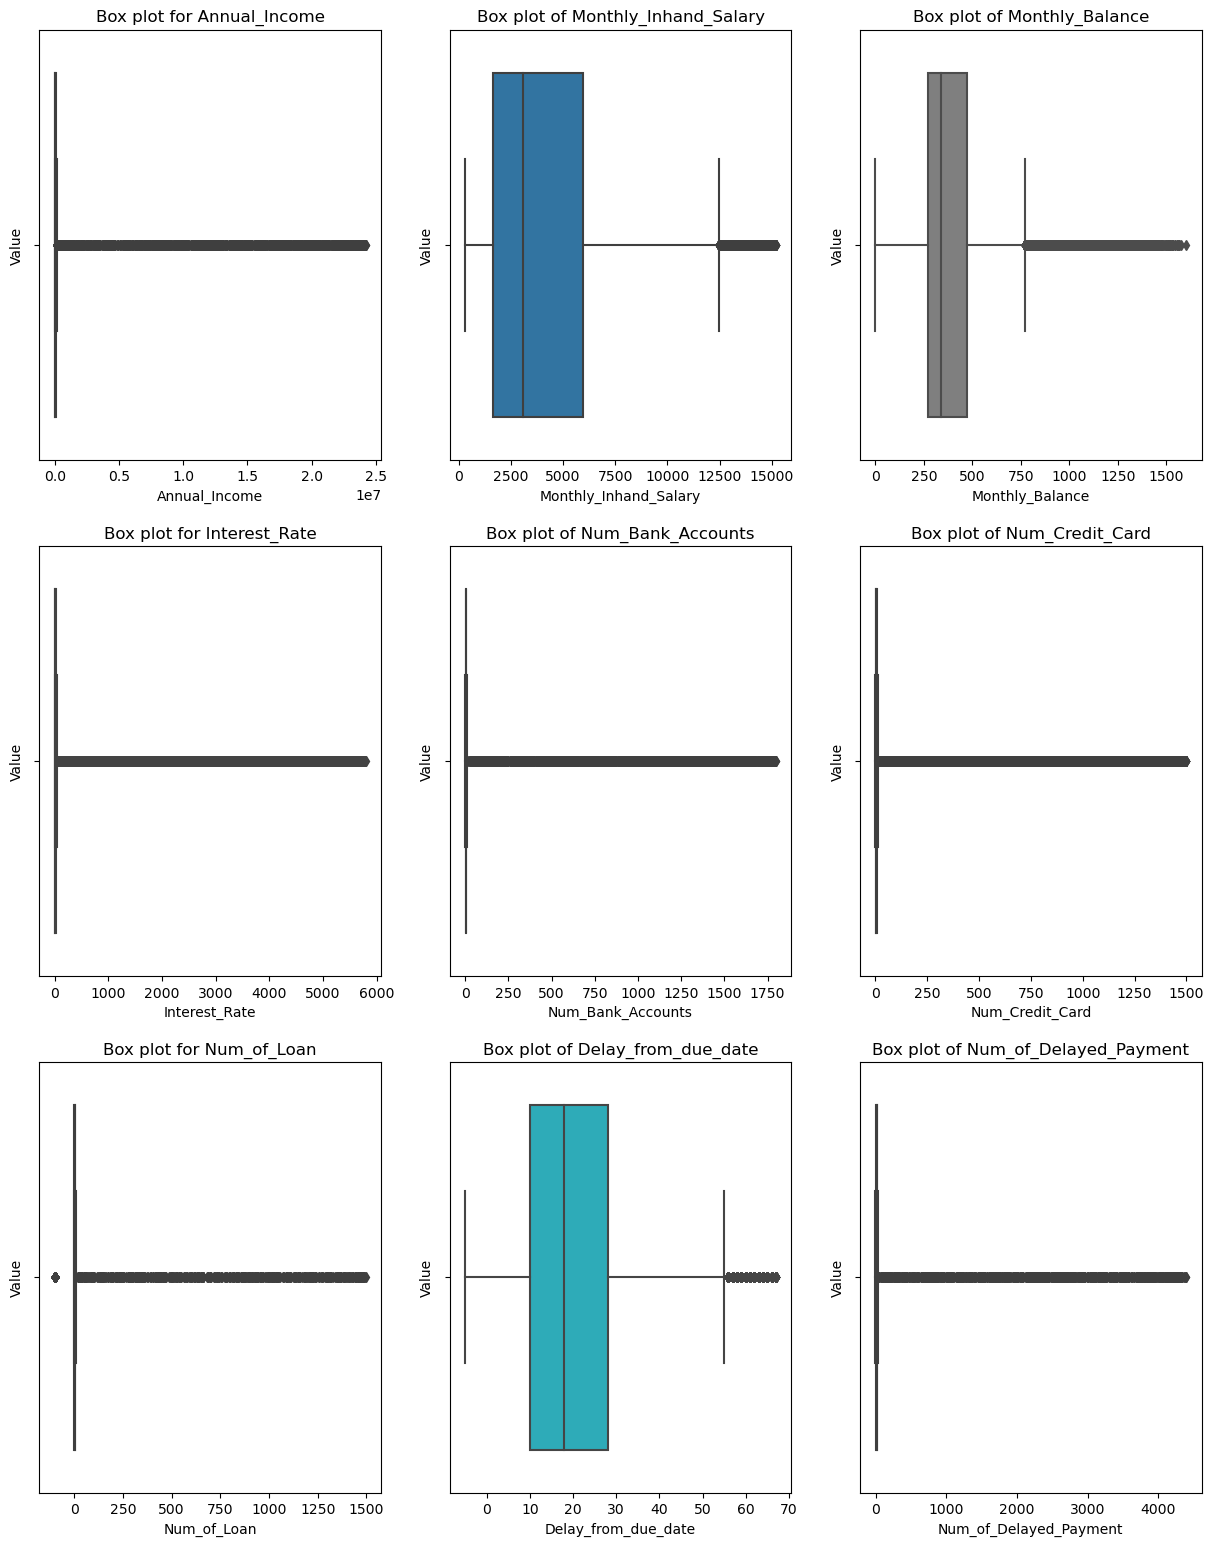

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(15, 19))
default_palette = sns.color_palette()

sns.boxplot(x=df["Annual_Income"], ax=axes[0, 0])
axes[0, 0].set_title("Box plot for Annual_Income")
axes[0, 0].set_xlabel("Annual_Income")
axes[0, 0].set_ylabel("Value")

sns.boxplot(x=df["Monthly_Inhand_Salary"], ax=axes[0, 1])
axes[0, 1].set_title("Box plot of Monthly_Inhand_Salary")
axes[0, 1].set_xlabel("Monthly_Inhand_Salary")
axes[0, 1].set_ylabel("Value")

sns.boxplot(x=df["Monthly_Balance"], ax=axes[0, 2],color=default_palette[7])
axes[0, 2].set_title("Box plot of Monthly_Balance")
axes[0, 2].set_xlabel("Monthly_Balance")
axes[0, 2].set_ylabel("Value")

sns.boxplot(x=df["Interest_Rate"], ax=axes[1, 0],color=default_palette[8])
axes[1, 0].set_title("Box plot for Interest_Rate")
axes[1, 0].set_xlabel("Interest_Rate")
axes[1, 0].set_ylabel("Value")

sns.boxplot(x=df["Num_Bank_Accounts"], ax=axes[1, 1])
axes[1, 1].set_title("Box plot of Num_Bank_Accounts")
axes[1, 1].set_xlabel("Num_Bank_Accounts")
axes[1, 1].set_ylabel("Value")

sns.boxplot(x=df["Num_Credit_Card"], ax=axes[1, 2])
axes[1, 2].set_title("Box plot of Num_Credit_Card")
axes[1, 2].set_xlabel("Num_Credit_Card")
axes[1, 2].set_ylabel("Value")

sns.boxplot(x=df["Num_of_Loan"], ax=axes[2, 0])
axes[2, 0].set_title("Box plot for Num_of_Loan")
axes[2, 0].set_xlabel("Num_of_Loan")
axes[2, 0].set_ylabel("Value")

sns.boxplot(x=df["Delay_from_due_date"], ax=axes[2, 1],color=default_palette[9])
axes[2, 1].set_title("Box plot of Delay_from_due_date")
axes[2, 1].set_xlabel("Delay_from_due_date")
axes[2, 1].set_ylabel("Value")

sns.boxplot(x=df["Num_of_Delayed_Payment"], ax=axes[2, 2])
axes[2, 2].set_title("Box plot of Num_of_Delayed_Payment")
axes[2, 2].set_xlabel("Num_of_Delayed_Payment")
axes[2, 2].set_ylabel("Value")
plt.show()


Text(0, 0.5, 'Value')

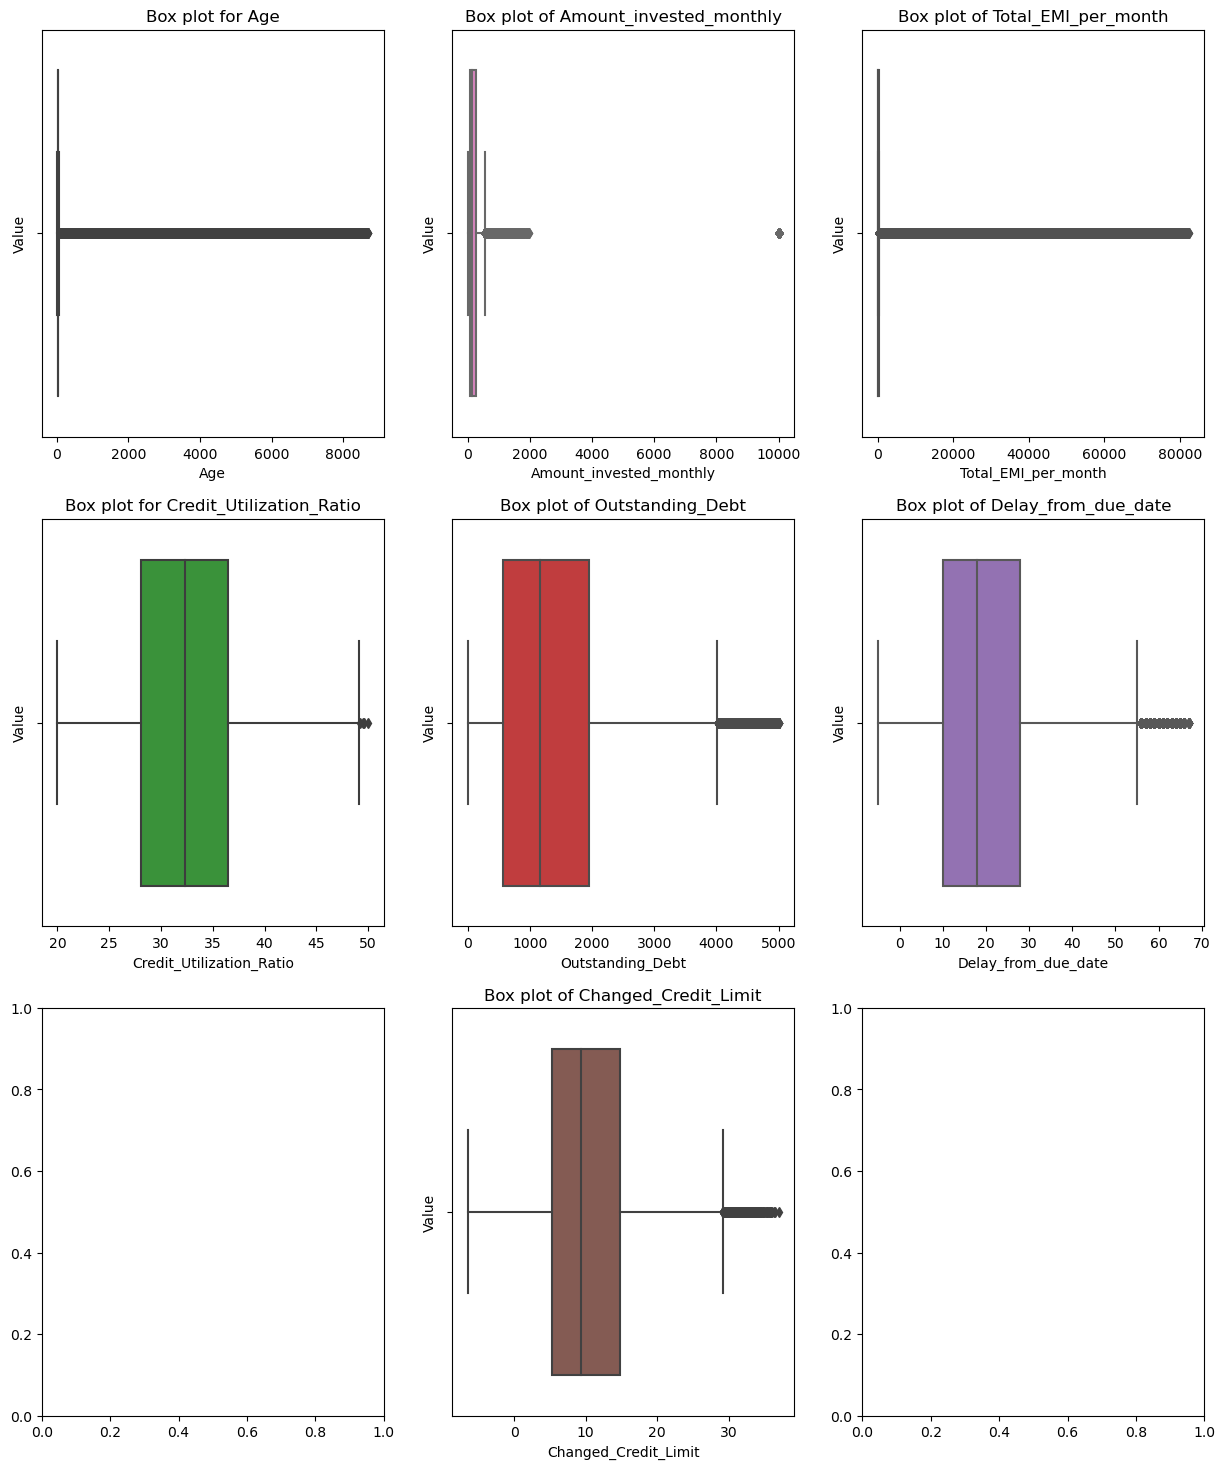

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(15, 18))
default_palette = sns.color_palette()

sns.boxplot(x=df["Age"], ax=axes[0, 0],color=default_palette[5])
axes[0, 0].set_title("Box plot for Age")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Value")


sns.boxplot(x=df["Amount_invested_monthly"], ax=axes[0, 1],color=default_palette[6])
axes[0, 1].set_title("Box plot of Amount_invested_monthly")
axes[0, 1].set_xlabel("Amount_invested_monthly")
axes[0, 1].set_ylabel("Value")

sns.boxplot(x=df["Total_EMI_per_month"], ax=axes[0, 2],color=default_palette[1])
axes[0, 2].set_title("Box plot of Total_EMI_per_month")
axes[0, 2].set_xlabel("Total_EMI_per_month")
axes[0, 2].set_ylabel("Value")

sns.boxplot(x=df["Credit_Utilization_Ratio"], ax=axes[1, 0],color=default_palette[2])
axes[1, 0].set_title("Box plot for Credit_Utilization_Ratio")
axes[1, 0].set_xlabel("Credit_Utilization_Ratio")
axes[1, 0].set_ylabel("Value")

sns.boxplot(x=df["Outstanding_Debt"], ax=axes[1, 1],color=default_palette[3])
axes[1, 1].set_title("Box plot of Outstanding_Debt")
axes[1, 1].set_xlabel("Outstanding_Debt")
axes[1, 1].set_ylabel("Value")

sns.boxplot(x=df["Delay_from_due_date"], ax=axes[1, 2],color=default_palette[4])
axes[1, 2].set_title("Box plot of Delay_from_due_date")
axes[1, 2].set_xlabel("Delay_from_due_date")
axes[1, 2].set_ylabel("Value")


sns.boxplot(x=df["Changed_Credit_Limit"], ax=axes[2, 1],color=default_palette[5])
axes[2, 1].set_title("Box plot of Changed_Credit_Limit")
axes[2, 1].set_xlabel("Changed_Credit_Limit")
axes[2, 1].set_ylabel("Value")

### Dealing with Age column the best way to fill outliers is mode

THE MODE OF AGE COLUMN IS : 0    38
Name: Age, dtype: int32
The number of null values = 0


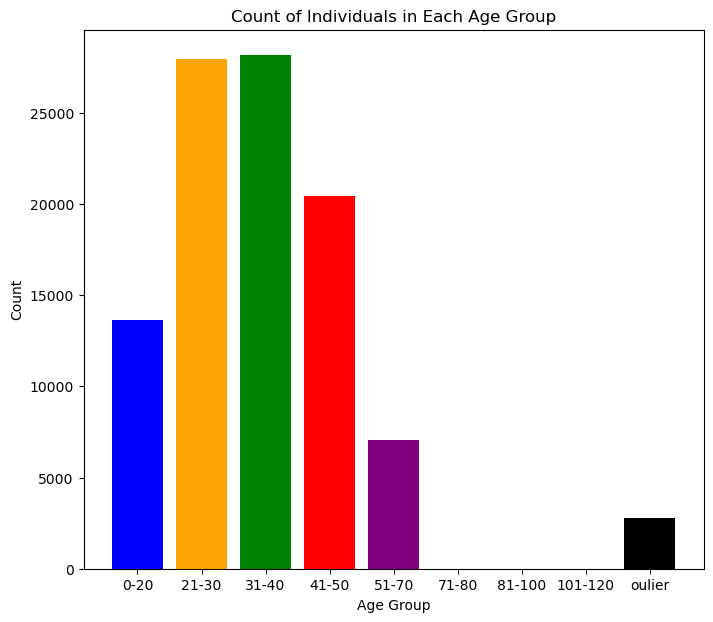

In [ ]:
age_min = df["Age"].min()
age_max = df["Age"].max()
bin_edges = [age_min - 1, 20, 30, 40, 50, 70, 80, 100, 120, age_max]

# Define the bin labels
bin_labels = ["0-20", "21-30", "31-40", "41-50", "51-70", "71-80", "81-100", "101-120", "oulier"]

# Apply pd.cut() to create the 'Age Group' column
df['Age Group'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels)

# Count the number of occurrences of each Age Group
figure=plt.figure(figsize=(8,7))
age_group_counts = df['Age Group'].value_counts().sort_index()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'gray',"black"]

# Plot the bar graph
plt.bar(age_group_counts.index, age_group_counts.values,color=colors)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Individuals in Each Age Group')
print("THE MODE OF AGE COLUMN IS :",df["Age"].mode())
isnull("Annual_Income")
# Display the graph
plt.show()

In [ ]:
mode_age=df["Age"].mode().values[0]
df["Age"] = df["Age"].apply(lambda x: mode_age if x > 70 else x)
#transform the Null values as per above graph  and if the age is above 100 consider as outlier and filling
#it with mode

## Annual Income

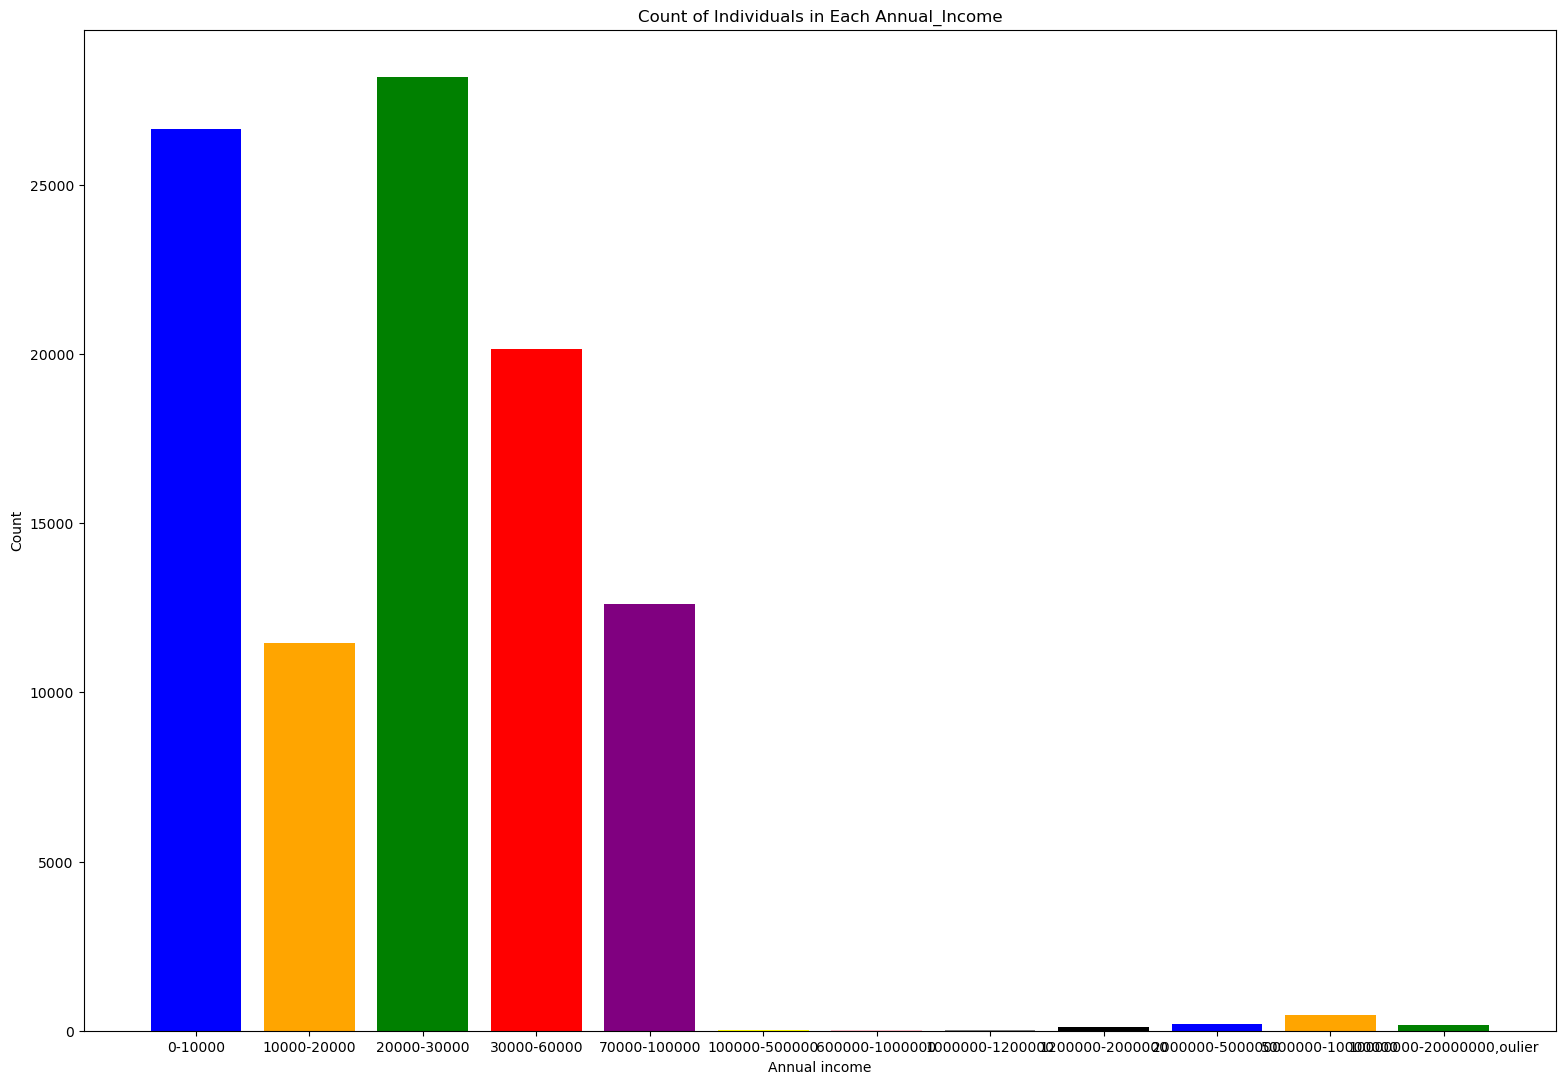

In [ ]:
age_min = df["Annual_Income"].min()
age_max = df["Annual_Income"].max()
bin_edges = [age_min - 10000, 20000, 30000,60000,100000,500000,1000000,1200000,2000000,5000000,10000000,20000000, age_max]
# Define the bin labels
bin_labels = ["0-10000","10000-20000","20000-30000", "30000-60000","70000-100000" ,"100000-500000","600000-1000000","1000000-1200000","1200000-2000000","2000000-5000000", "5000000-10000000","10000000-20000000," "oulier"]
df['Age Group'] = pd.cut(df['Annual_Income'], bins=bin_edges, labels=bin_labels)
figure=plt.figure(figsize=(19,13))
age_group_counts = df['Age Group'].value_counts().sort_index()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'gray',"black"]
plt.bar(age_group_counts.index, age_group_counts.values,color=colors)
plt.xlabel('Annual income')
plt.ylabel('Count')
plt.title('Count of Individuals in Each Annual_Income')
plt.show()

In [ ]:
print("Maximum value in Annual income=",df["Annual_Income"].max(),"\n","Minimum value in Annual income=",df["Annual_Income"].min())
print("\n")
print("Number of records with annual income greater than 20000000 =",len(df.loc[df["Annual_Income"]>20000000]))
#No as per domain knowledge those are not treated as Outliers
isnull("Annual_Income")
print(df["Annual_Income"].mode().values[0])

Maximum value in Annual income= 24198062.0 
 Minimum value in Annual income= 7005.93


Number of records with annual income greater than 20000000 = 180
The number of null values = 0
9141.63


In [ ]:
upper_limit=df["Annual_Income"].mean()+3*df["Annual_Income"].std()
lower_limit=df["Annual_Income"].mean()-3*df["Annual_Income"].std()
upper_limit,lower_limit

(4465269.855540589, -4112438.4529442894)

In [ ]:
df["Annual_Income"].min()

7005.93

In [ ]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Winsorization is a statistical technique used to handle outliers in data by replacing extreme values with less extreme values. It involves replacing the values at the tails of a distribution with a specified percentile value, which can help reduce the impact of outliers on statistical analysis or modeling.


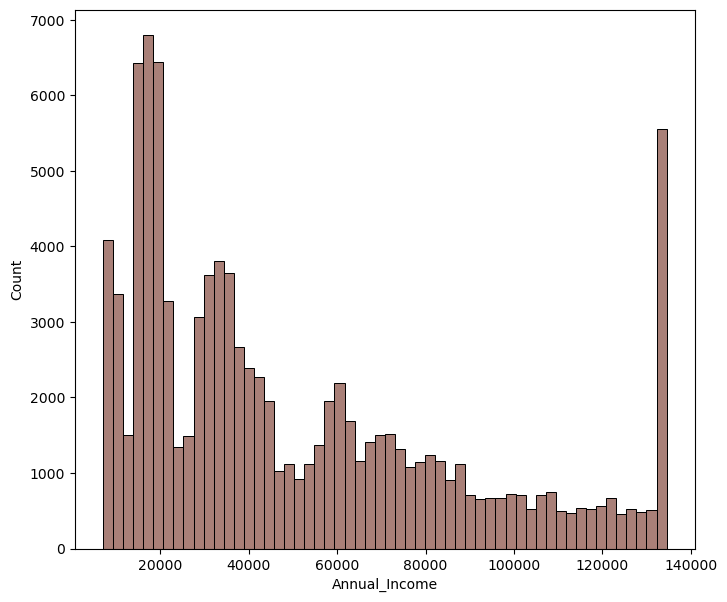

In [ ]:
# Annual income cant be in Negative so replaced it with 0 and for outliers handling i used winsorize
# 95 percentale
minium_value=0
df["Annual_Income"].apply(lambda x:minium_value if x<0 else x )
from scipy.stats.mstats import winsorize
winsorized= winsorize(df["Annual_Income"], limits=[None, 0.05])
df["Annual_Income"] = winsorized
figure=plt.figure(figsize=(8,7))
color=default_palette[5]
sns.histplot(df["Annual_Income"],color=color)
plt.show()

In [ ]:
df["Annual_Income"].min()

7005.93

# Monthly_Inhand_Salary

<Figure size 640x480 with 0 Axes>

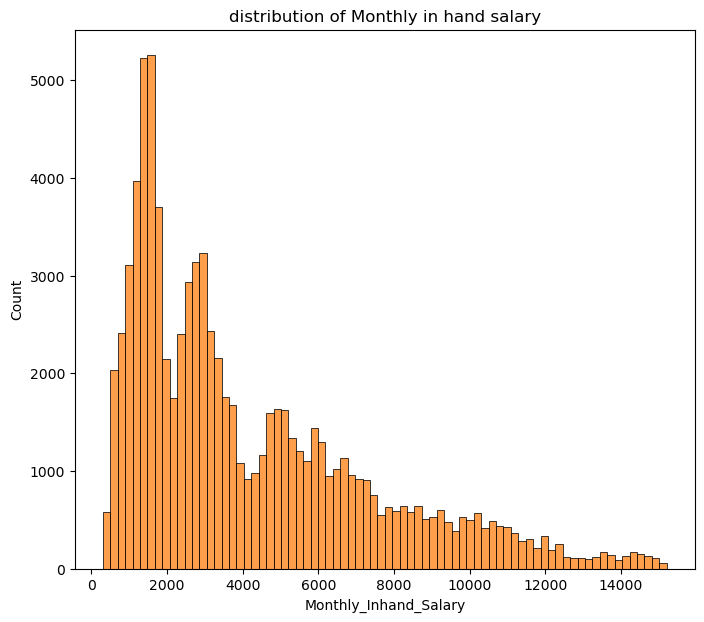

In [ ]:
default_palette = sns.color_palette()
fig = plt.figure(facecolor='lightblue')
figure=plt.figure(figsize=(8,7))
color=default_palette[1]
sns.histplot(df['Monthly_Inhand_Salary'],color=color)
plt.title("distribution of Monthly in hand salary")
plt.show()

In [ ]:
max_min("Monthly_Inhand_Salary")
isnull("Monthly_Inhand_Salary")
print("Need to fill null values")
print("The mode of data is",df["Monthly_Inhand_Salary"].mode().values[0])

The maximum value =  15204.633333333331 
 The Minimum value =  303.6454166666666
The number of null values = 15002
Need to fill null values
The mode of data is 2295.058333333333


In [ ]:
winsorized_1= winsorize(df["Monthly_Inhand_Salary"], limits=[None, 0.05])
df["Monthly_Inhand_Salary"]=winsorized_1
#NEED TO FILL THE OUTLIERS WITH HELP OF KNNIMPUTER
from sklearn.impute import KNNImputer
knnimputer=KNNImputer(n_neighbors=6)
imputer_input =df["Monthly_Inhand_Salary"].values.reshape(-1, 1)
imputed_values=knnimputer.fit_transform(imputer_input)

In [ ]:
df["Monthly_Inhand_Salary"] = imputed_values

In [ ]:
df["Monthly_Inhand_Salary"].min()

303.6454166666666

# Number of bank accounts

In [ ]:
max_min("Num_Bank_Accounts")
isnull("Num_Bank_Accounts")
print("The mode of data is",df["Num_Bank_Accounts"].mode().values[0])

The maximum value =  1798 
 The Minimum value =  -1
The number of null values = 0
The mode of data is 6


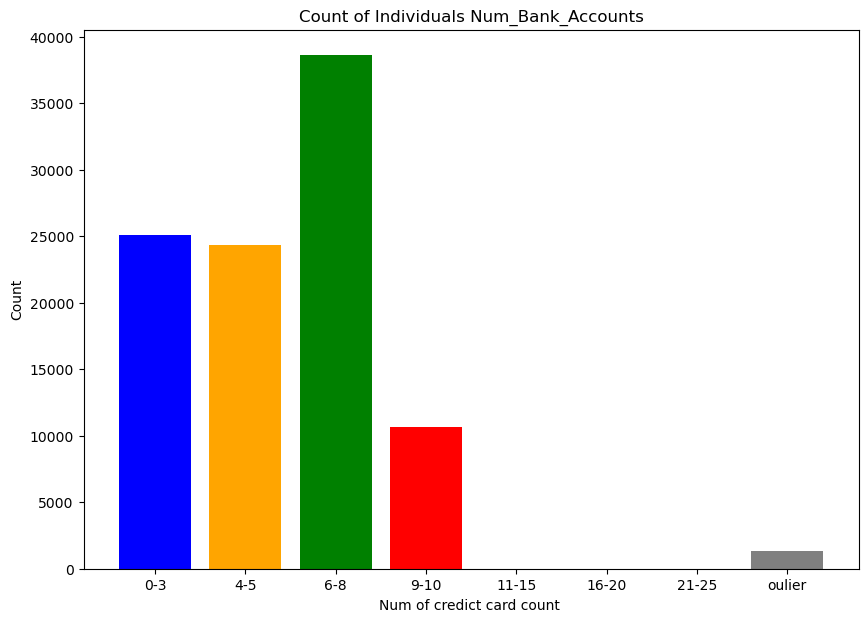

In [ ]:
Num_min = df["Num_Bank_Accounts"].min()
Num_max = df["Num_Bank_Accounts"].max()
bin_edges = [Num_min - 1, 3, 5, 8, 10, 15, 20, 25, Num_max]
bin_labels = ["0-3", "4-5", "6-8", "9-10", "11-15", "16-20", "21-25", "oulier"]
df['num_bank_acc'] = pd.cut(df['Num_Bank_Accounts'], bins=bin_edges, labels=bin_labels)
figure=plt.figure(figsize=(10,7))
num_bank_acc= df["num_bank_acc"].value_counts().sort_index()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'gray',"black"]

plt.bar(num_bank_acc.index,num_bank_acc.values,color=colors)
plt.xlabel('Num of credict card count ')
plt.ylabel('Count')
plt.title('Count of Individuals Num_Bank_Accounts')
plt.show()

In [ ]:
#WITH THE HELP OF THE GRAPH WE CAN SEE THE THERE IS LARGE DATA GAP IN DATA SO WE CAN FILL OUTLIERS BY IF THE
#NUM OF CREDICT NUMBER GREATER THAN 10 CAN REPLACE  THEM WITH MODE. AND NO NULL VALUES

mode_card=df["Num_Bank_Accounts"].mode().values[0]
df['Num_Bank_Accounts']=df['Num_Bank_Accounts'].apply(lambda x:mode_card if x>12 else(mode_card if x<0 else x))

In [ ]:
df["Num_Bank_Accounts"].min()

0

# Number of credict cards

In [ ]:
max_min('Num_Credit_Card')
isnull('Num_Credit_Card')
print("The Mode of the data is", df['Num_Credit_Card'].mode().values[0])

The maximum value =  1499 
 The Minimum value =  0
The number of null values = 0
The Mode of the data is 5


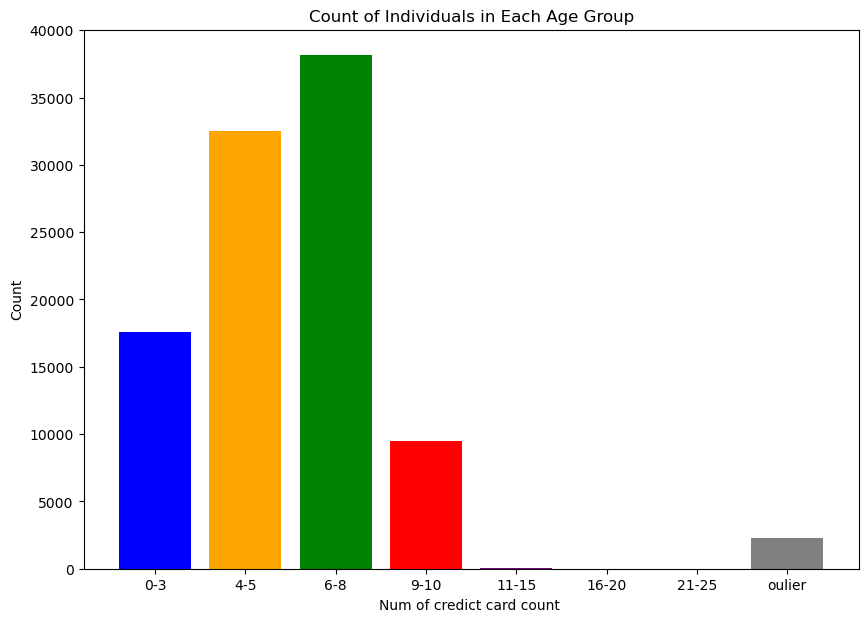

In [ ]:
Num_min = df["Num_Credit_Card"].min()
Num_max = df["Num_Credit_Card"].max()
bin_edges = [Num_min - 1, 3, 5, 8, 10, 15, 20, 25, Num_max]
bin_labels = ["0-3", "4-5", "6-8", "9-10", "11-15", "16-20", "21-25", "oulier"]
df['num_credict card'] = pd.cut(df['Num_Credit_Card'], bins=bin_edges, labels=bin_labels)
figure=plt.figure(figsize=(10,7))
num_credict_counts = df['num_credict card'].value_counts().sort_index()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'gray',"black"]
plt.bar(num_credict_counts.index, num_credict_counts.values,color=colors)
plt.xlabel('Num of credict card count ')
plt.ylabel('Count')
plt.title('Count of Individuals in Each Age Group')
plt.show()

#FILLING THE OUTLIER WITH MODE IF NUMBER OF CREDICT CARD IS GREATER THAN 12 FILL THE VALUE BY MODE
mini_value=0
mode_cre=df["Num_Credit_Card"].mode().values[0]
df["Num_Credit_Card"]=df["Num_Credit_Card"].apply(lambda x:mode_cre if x>10 else(mini_value if x<0 else x))

In [ ]:
mode_1=df["Num_Credit_Card"].mode().values[0]
df["Num_Credit_Card"]=df["Num_Credit_Card"].apply(lambda x:mode_1 if x<=0 else x)
winsorized_IN= winsorize(df["Num_Credit_Card"],limits=[None, 0.05])
df["Num_Credit_Card"]=winsorized_IN
df["Num_Credit_Card"].min()

1

# INTEREST Rate

In [ ]:
max_min("Interest_Rate")
isnull("Interest_Rate")
print("The mode of data is",df["Interest_Rate"].mode().values[0])

The maximum value =  5797 
 The Minimum value =  1
The number of null values = 0
The mode of data is 8


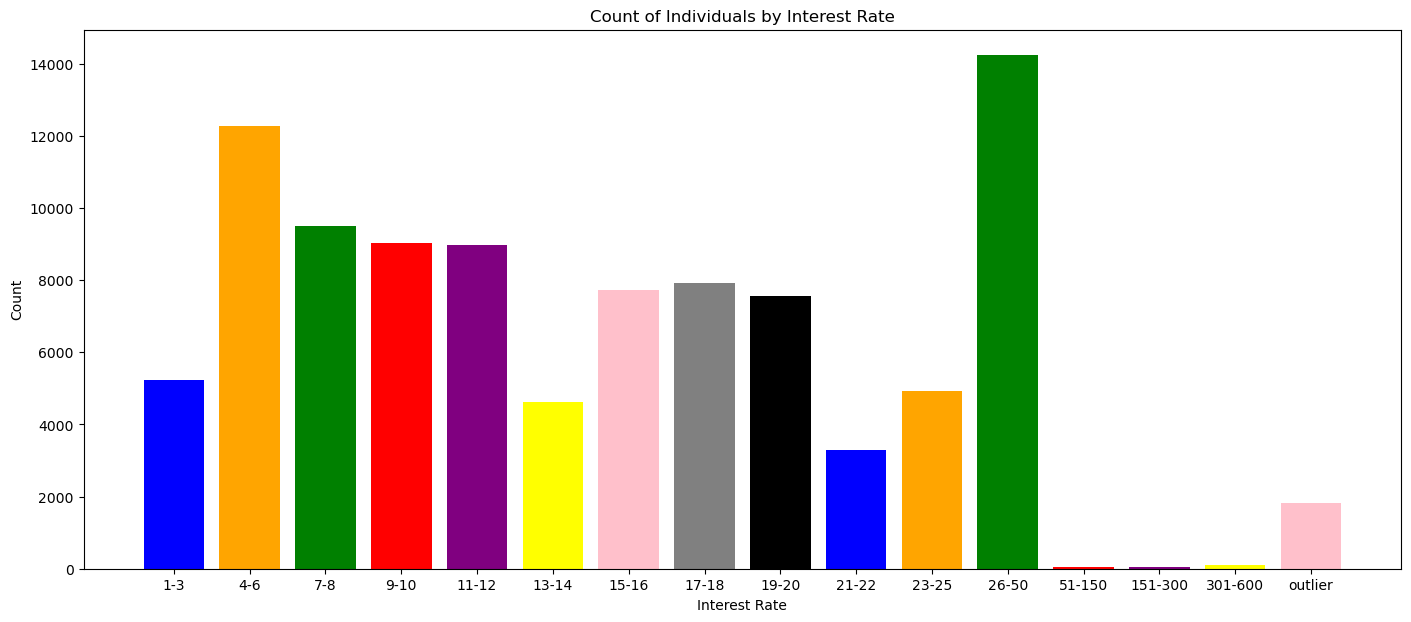

In [ ]:
# Calculate the maximum and minimum interest rates
interest_max = df["Interest_Rate"].max()
interest_min = df["Interest_Rate"].min()
bin_edges = [1, 3, 6, 8, 10, 12, 14, 16, 18,20,22,25,50,150,300,600,interest_max]
bin_labels = ["1-3", "4-6", "7-8", "9-10", "11-12", "13-14", "15-16", "17-18","19-20","21-22","23-25","26-50","51-150","151-300","301-600","outlier"]
df['Interest_Rate_count'] = pd.cut(df['Interest_Rate'], bins=bin_edges, labels=bin_labels)
num_interest_counts = df['Interest_Rate_count'].value_counts().sort_index()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'gray', 'black']
figure = plt.figure(figsize=(17, 7))
plt.bar(num_interest_counts.index, num_interest_counts.values, color=colors)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Count of Individuals by Interest Rate')
plt.show()

In [ ]:
winsorized_IN= winsorize(df["Interest_Rate"],limits=[None, 0.03])
df["Interest_Rate"]=winsorized_IN

In [ ]:
df["Interest_Rate"].min()

1

# NUMBER OF LOANS CUSTOMER HAS TAKEN

In [ ]:
max_min("Num_of_Loan")
isnull("Num_of_Loan")
print("The mode of data is",df["Num_of_Loan"].mode().values[0])

The maximum value =  1496 
 The Minimum value =  -100
The number of null values = 0
The mode of data is 3


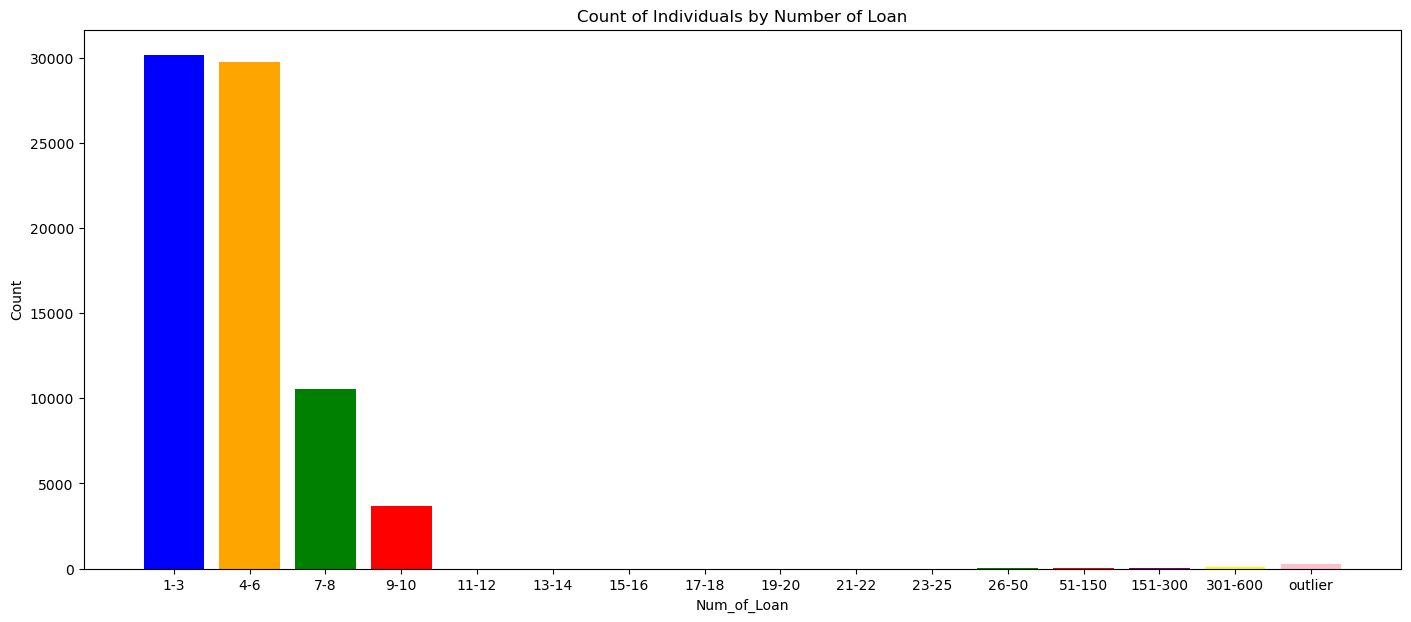

In [ ]:
interest_max = df["Num_of_Loan"].max()
interest_min = df["Num_of_Loan"].min()
bin_edges = [1, 3, 6, 8, 10, 12, 14, 16, 18,20,22,25,50,150,300,600,interest_max]
bin_labels = ["1-3", "4-6", "7-8", "9-10", "11-12", "13-14", "15-16", "17-18","19-20","21-22","23-25","26-50","51-150","151-300","301-600","outlier"]
df['Interest_Rate_count'] = pd.cut(df['Num_of_Loan'], bins=bin_edges, labels=bin_labels)
num_interest_counts = df['Interest_Rate_count'].value_counts().sort_index()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'gray', 'black']
figure = plt.figure(figsize=(17, 7))
plt.bar(num_interest_counts.index, num_interest_counts.values, color=colors)
plt.xlabel('Num_of_Loan')
plt.ylabel('Count')
plt.title('Count of Individuals by Number of Loan')
plt.show()

In [ ]:
df["Num_of_Loan"]=df["Num_of_Loan"].apply(lambda x:0 if x<0 else x )
winsorized_IN= winsorize(df["Num_of_Loan"],limits=[None, 0.05])
df["Num_of_Loan"]=winsorized_IN
df["Num_of_Loan"].min()

0

 # Delay from due days

In [ ]:
max_min("Delay_from_due_date")
isnull("Delay_from_due_date")
print("The mode of data is",df["Delay_from_due_date"].mode().values[0])

The maximum value =  67 
 The Minimum value =  -5
The number of null values = 0
The mode of data is 15


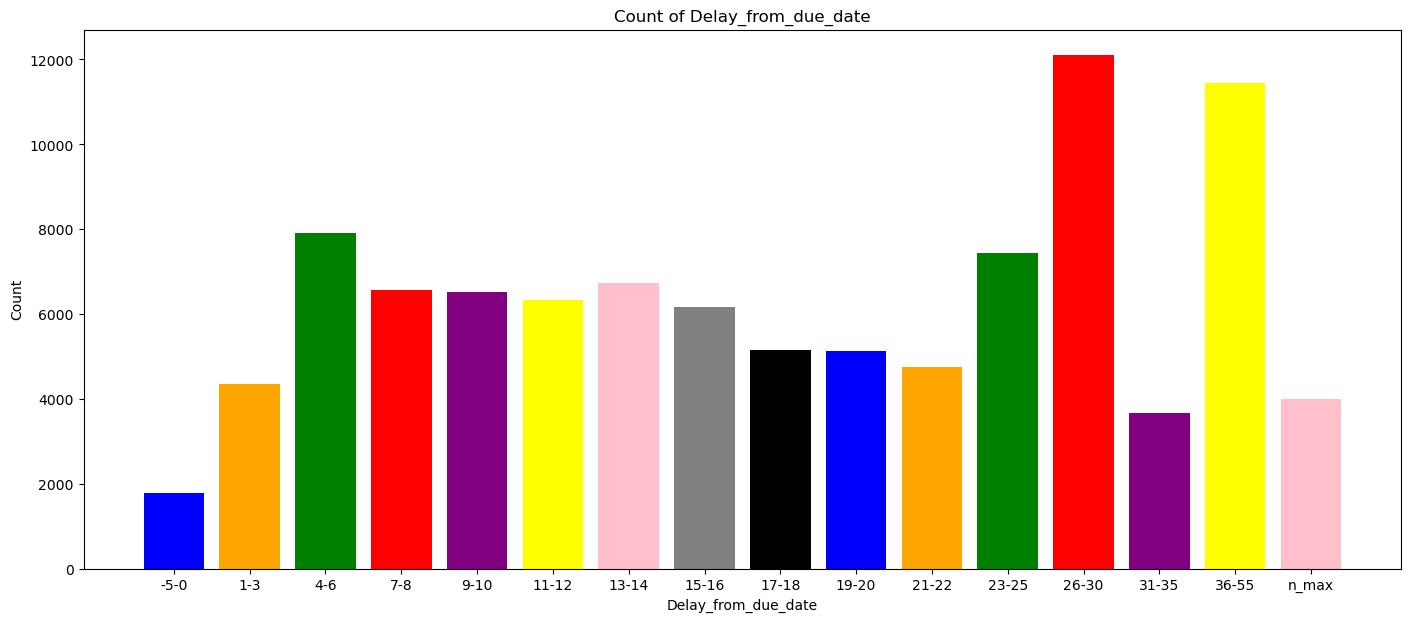

In [ ]:
n_max = df["Delay_from_due_date"].max()
n_min = df["Delay_from_due_date"].min()
bin_edges = [n_min-1,0,3, 6, 8, 10, 12, 14, 16,18,20,22,25,30,35,55,n_max]
bin_labels = ["-5-0","1-3","4-6","7-8", "9-10","11-12", "13-14","15-16","17-18","19-20","21-22","23-25","26-30","31-35","36-55","n_max"]
df['Interest_Rate_count']=pd.cut(df['Delay_from_due_date'], bins=bin_edges, labels=bin_labels)
num_interest_counts= df['Interest_Rate_count'].value_counts().sort_index()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'gray', 'black']
figure = plt.figure(figsize=(17, 7))
plt.bar(num_interest_counts.index, num_interest_counts.values, color=colors)
plt.xlabel('Delay_from_due_date')
plt.ylabel('Count')
plt.title('Count of Delay_from_due_date')
plt.show()

In [ ]:
df["Delay_from_due_date"]=df["Delay_from_due_date"].apply(lambda x:0 if x<0 else x )
winsorized_Dd= winsorize(df["Delay_from_due_date"],limits=[None, 0.05])
df["Delay_from_due_date"]=winsorized_Dd

In [ ]:
imputer_input=df["Delay_from_due_date"].values.reshape(-1, 1)
imputed_values = knnimputer.fit_transform(imputer_input)
# Update the DataFrame with the imputed values
df["Delay_from_due_date"] = imputed_values

In [ ]:
df["Delay_from_due_date"].min()

0.0

# Number of Delyed payment

In [ ]:
max_min('Num_of_Delayed_Payment')
isnull('Num_of_Delayed_Payment')
print("The mode of data is",df['Num_of_Delayed_Payment'].mode().values[0])

The maximum value =  4397.0 
 The Minimum value =  -3.0
The number of null values = 7002
The mode of data is 19.0


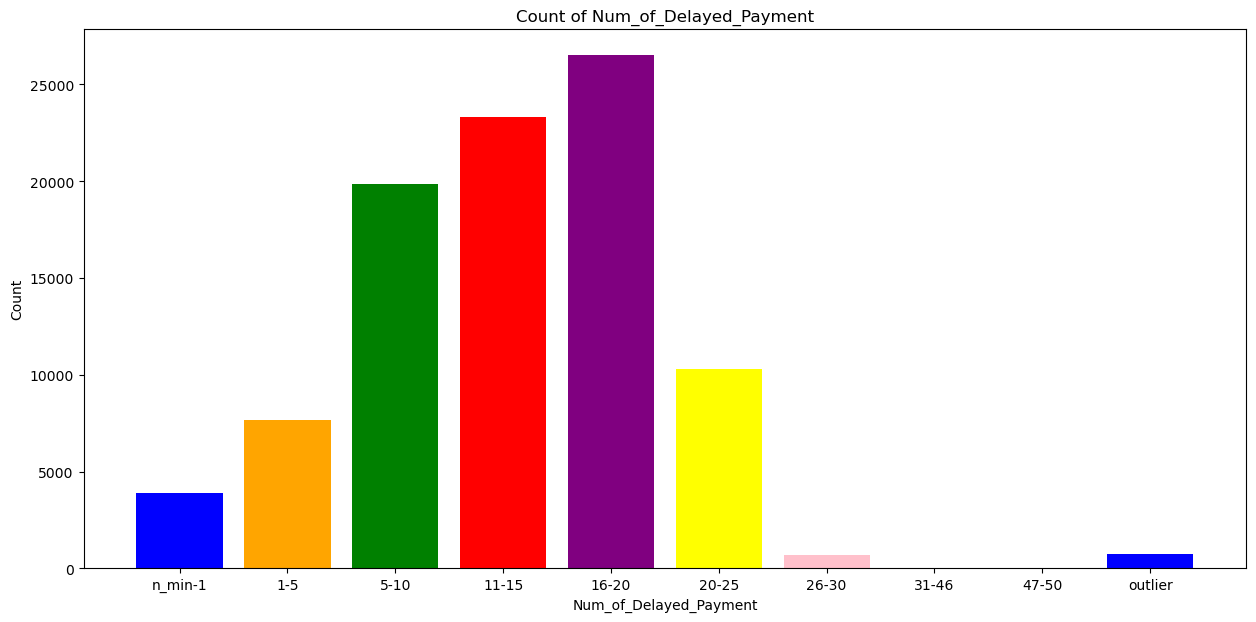

In [ ]:
np_max = df["Num_of_Delayed_Payment"].max()
np_min = df["Num_of_Delayed_Payment"].min()
bin_edges = [np_min-1,1, 5, 10, 15 ,20, 25, 30, 46, 50,np_max]
bin_labels = ["n_min-1","1-5","5-10","11-15","16-20", "20-25", "26-30", "31-46", "47-50","outlier"]
df['Interest_Rate_count'] = pd.cut(df['Num_of_Delayed_Payment'], bins=bin_edges, labels=bin_labels)
num_interest_counts =df['Interest_Rate_count'].value_counts().sort_index()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'gray', 'black']
figure = plt.figure(figsize=(15, 7))
plt.bar(num_interest_counts.index, num_interest_counts.values, color=colors)
plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Count')
plt.title('Count of Num_of_Delayed_Payment')
plt.show()

In [ ]:
#Handling the outlier with help of Winsorizer
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].apply(lambda x:0 if x<0 else x)
winsorized_Dd= winsorize(df["Num_of_Delayed_Payment"],limits=[None, 0.05])
df["Num_of_Delayed_Payment"]=winsorized_Dd

In [ ]:
imputer = KNNImputer(n_neighbors=5)
# Reshape the column data to a 2D array for imputation
imputer_inputed=df["Num_of_Delayed_Payment"].values.reshape(-1, 1)
# Perform imputation
imputed_values = imputer.fit_transform(imputer_inputed)

# Update the DataFrame with the imputed values
df["Num_of_Delayed_Payment"]= imputed_values

In [ ]:
df["Num_of_Delayed_Payment"].min()

0.0

 ### Changed_Credit_Limit: Represents the percentage change in credit card limit

In [ ]:
max_min('Changed_Credit_Limit')
isnull('Changed_Credit_Limit')
print("The mode of data is",df['Changed_Credit_Limit'].mode().values[0])

The maximum value =  36.97 
 The Minimum value =  -6.49
The number of null values = 2091
The mode of data is 8.22


<function matplotlib.pyplot.show(close=None, block=None)>

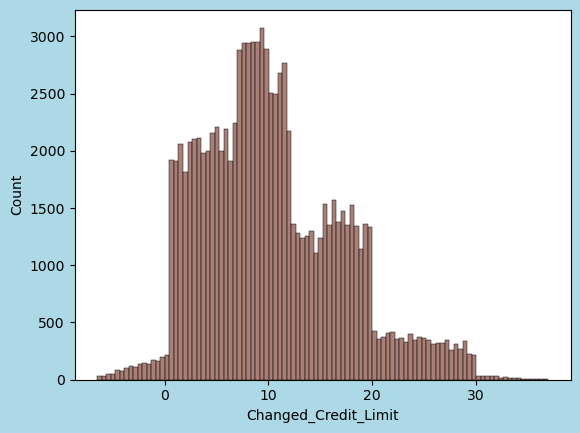

In [ ]:
default_palette = sns.color_palette()
fig = plt.figure(facecolor='lightblue')
color=default_palette[5]
#color=default_palette[1]
sns.histplot(df["Changed_Credit_Limit"],bins=100,color=color)
plt.show

In [ ]:
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].apply(lambda x:0 if x<0 else x)
winsorized_Dd= winsorize(df["Changed_Credit_Limit"],limits=[None, 0.05])
df["Changed_Credit_Limit"]=winsorized_Dd

In [ ]:
imputer = KNNImputer(n_neighbors=3)
# Reshape the column data to a 2D array for imputation
imputer_inputed=df["Changed_Credit_Limit"].values.reshape(-1, 1)
# Perform imputation
imputed_values = imputer.fit_transform(imputer_inputed)
# Update the DataFrame with the imputed values
df["Changed_Credit_Limit"]= imputed_values

In [ ]:
df["Changed_Credit_Limit"].min()

0.0

## Number of credict Inquries

In [ ]:
max_min('Num_Credit_Inquiries')
isnull('Num_Credit_Inquiries')
print("The mode of data is",df['Num_Credit_Inquiries'].mode().values[0])

The maximum value =  2597.0 
 The Minimum value =  0.0
The number of null values = 1965
The mode of data is 4.0


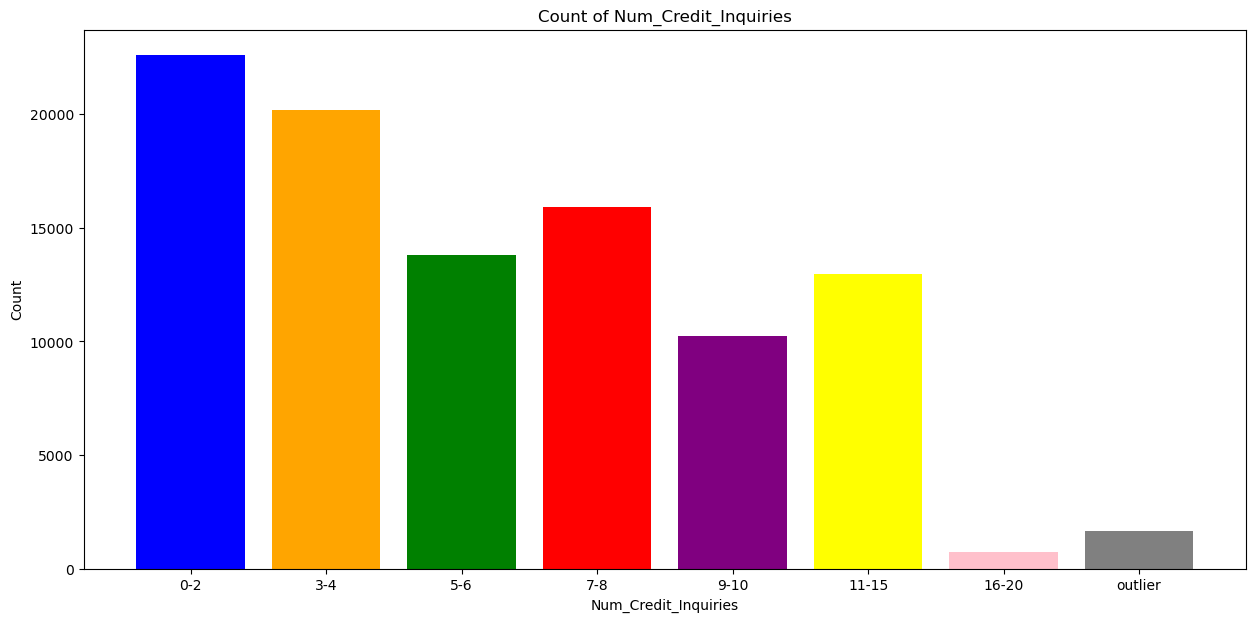

In [ ]:
in_max = df["Num_Credit_Inquiries"].max()
in_min = df["Num_Credit_Inquiries"].min()
bin_edges = [np_min-1,2, 4, 6, 8 ,10,15,20,np_max]
bin_labels = ["0-2","3-4","5-6","7-8","9-10","11-15","16-20","outlier"]
df['Interest_Rate_count'] = pd.cut(df['Num_Credit_Inquiries'], bins=bin_edges, labels=bin_labels)
num_interest_counts =df['Interest_Rate_count'].value_counts().sort_index()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'gray', 'black']
figure = plt.figure(figsize=(15, 7))
plt.bar(num_interest_counts.index, num_interest_counts.values, color=colors)
plt.xlabel('Num_Credit_Inquiries')
plt.ylabel('Count')
plt.title('Count of Num_Credit_Inquiries')
plt.show()

In [ ]:
mode_of_num=df["Num_Credit_Inquiries"].mode()
df["Num_Credit_Inquiries"]=df["Num_Credit_Inquiries"].apply(lambda x:mode_of_num if x<0 else x)
winsorized_Dd= winsorize(df["Num_Credit_Inquiries"],limits=[None, 0.05])
df["Num_Credit_Inquiries"]=winsorized_Dd

In [ ]:
imputer = KNNImputer(n_neighbors=3)
# Reshape the column data to a 2D array for imputation
imputer_inputed=df["Num_Credit_Inquiries"].values.reshape(-1, 1)
# Perform imputation
imputed_values = imputer.fit_transform(imputer_inputed)
# Update the DataFrame with the imputed values
df["Num_Credit_Inquiries"]= imputed_values

In [ ]:
df["Num_Credit_Inquiries"].min()

0.0

## Outstanding_Debt

In [ ]:
max_min('Outstanding_Debt')
isnull('Outstanding_Debt')
print("The mode of data is",df['Outstanding_Debt'].mode().values[0])

The maximum value =  4073.71 
 The Minimum value =  0.23
The number of null values = 0
The mode of data is 4073.71


0.23

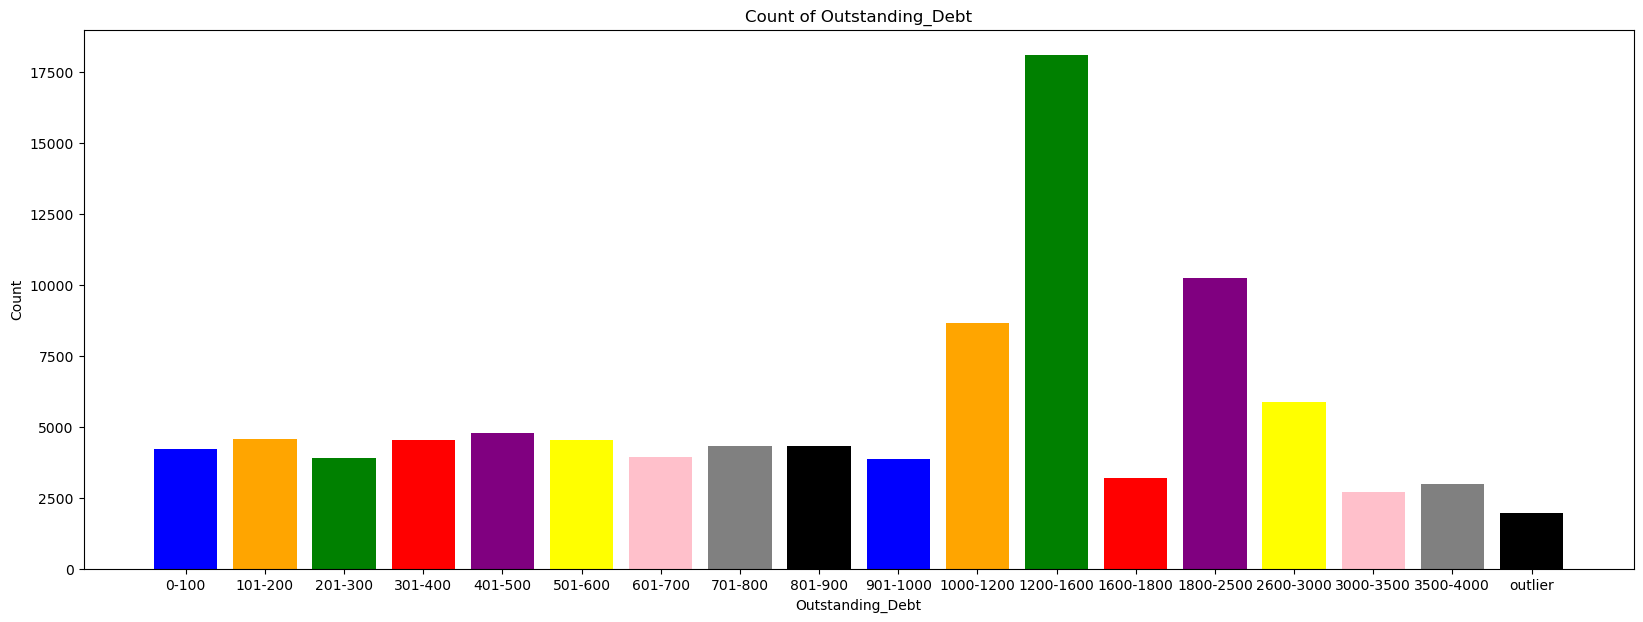

In [ ]:
in_max = df["Outstanding_Debt"].max()
in_min = df["Outstanding_Debt"].min()
bin_edges = [np_min-1,100, 200,300,400 ,500,600,700,800,900,1000,1200,1600,1800,2500,3000,3500,4000,np_max]
bin_labels = ["0-100","101-200","201-300","301-400","401-500","501-600","601-700","701-800","801-900","901-1000","1000-1200","1200-1600","1600-1800","1800-2500","2600-3000","3000-3500","3500-4000","outlier"]
df['Interest_Rate_count'] = pd.cut(df['Outstanding_Debt'], bins=bin_edges, labels=bin_labels)
num_interest_counts =df['Interest_Rate_count'].value_counts().sort_index()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'gray', 'black']
figure = plt.figure(figsize=(20, 7))
plt.bar(num_interest_counts.index, num_interest_counts.values, color=colors)
plt.xlabel('Outstanding_Debt')
plt.ylabel('Count')
plt.title('Count of Outstanding_Debt')
plt.show()
# As per Domain knowledge the Outstannding Depth can be any value they are not considered as outlier
#AND IT AS NOT NULL VALUES IT IS GOOD TO GO

In [ ]:
df["Outstanding_Debt"]=df["Outstanding_Debt"].apply(lambda x:0 if x<0 else x)
winsorized_Dd= winsorize(df["Outstanding_Debt"],limits=[None, 0.05])
df["Outstanding_Debt"]=winsorized_Dd
df["Outstanding_Debt"].min()

0.23

## Credit_Utilization_Ratio

In [ ]:
"Credit_Utilization_Ratio"
df["Credit_Utilization_Ratio"]
max_min('Credit_Utilization_Ratio')
isnull('Credit_Utilization_Ratio')
print("The mode of data  =",df['Credit_Utilization_Ratio'].mode().values[0])
# The data is very good
#No null values in the data

The maximum value =  50.00000000000001 
 The Minimum value =  20.0
The number of null values = 0
The mode of data  = 20.0


20.0

# Total_EMI_per_month

In [ ]:
max_min('Total_EMI_per_month')
isnull('Total_EMI_per_month')
print("The mode of data  =",df['Total_EMI_per_month'].mode().values[0])
# The data is very good EMI DEPENDS UP ON THE PERSON
#AND NO NULL VALUES feature is good to go

The maximum value =  82331.0 
 The Minimum value =  0.0
The number of null values = 0
The mode of data  = 0.0


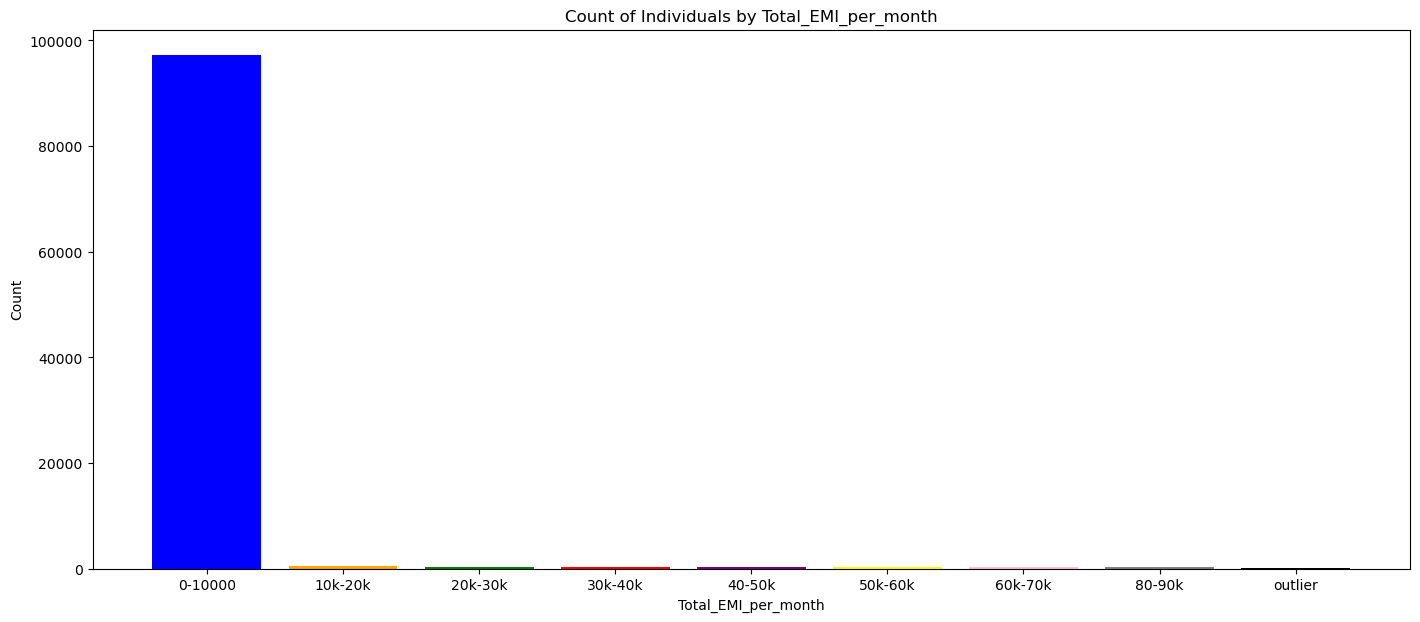

In [ ]:
interest_max = df["Total_EMI_per_month"].max()
interest_min = df["Total_EMI_per_month"].min()
bin_edges = [interest_min-1, 10000, 20000,30000, 40000, 50000,60000, 70000,80000,interest_max]
bin_labels = ["0-10000", "10k-20k", "20k-30k", "30k-40k", "40-50k", "50k-60k", "60k-70k", "80-90k","outlier"]
df['Interest_Rate_count'] = pd.cut(df['Total_EMI_per_month'], bins=bin_edges, labels=bin_labels)
num_interest_counts = df['Interest_Rate_count'].value_counts().sort_index()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'gray', 'black']
figure = plt.figure(figsize=(17, 7))
plt.bar(num_interest_counts.index, num_interest_counts.values, color=colors)
plt.xlabel('Total_EMI_per_month')
plt.ylabel('Count')
plt.title('Count of Individuals by Total_EMI_per_month')
plt.show()

In [ ]:
df["Total_EMI_per_month"]=df["Total_EMI_per_month"].apply(lambda x:0 if x<0 else x)


In [ ]:
winsorized_Dd= winsorize(df["Total_EMI_per_month"],limits=[None, 0.02])
df["Total_EMI_per_month"]=winsorized_Dd

0.0

## Amount_invested_monthly

In [ ]:
max_min('Amount_invested_monthly')
isnull('Amount_invested_monthly')
print("The mode of data  =",df['Amount_invested_monthly'].mode().values[0])


The maximum value =  10000.0 
 The Minimum value =  0.0
The number of null values = 4479
The mode of data  = 10000.0


In [ ]:
min_=df["Amount_invested_monthly"].median()
#len(df.loc[df["Amount_invested_monthly"]==10000])
min_

135.92568154608836

<Axes: >

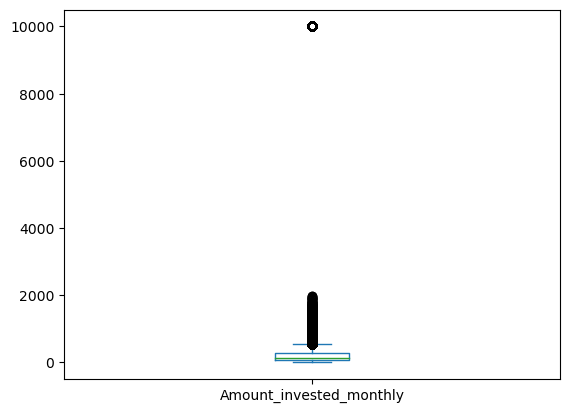

In [ ]:
df["Amount_invested_monthly"].plot(kind="box")

In [ ]:
new_df = df[df["Amount_invested_monthly"] == 10000].copy()  # Filtering based on condition
selected_columns = df[['Amount_invested_monthly', 'Monthly_Inhand_Salary']]
#h=selected_columns[(selected_columns["Amount_invested_monthly"] == 10000) & (selected_columns["Monthly_Inhand_Salary"]>15000)]
len(new_df)

4305

In [ ]:
winsorized_Dd= winsorize(df["Amount_invested_monthly"],limits=[None, 0.05])
df["Amount_invested_monthly"]=winsorized_Dd
df["Amount_invested_monthly"].max()

10000.0

## Monthly_Balance

In [ ]:
max_min('Monthly_Balance')
isnull('Monthly_Balance')
print("The mode of data  =",df['Monthly_Balance'].mode().values[0])

The maximum value =  1602.0405189622518 
 The Minimum value =  0.007759664775335295
The number of null values = 1209
The mode of data  = 0.007759664775335295


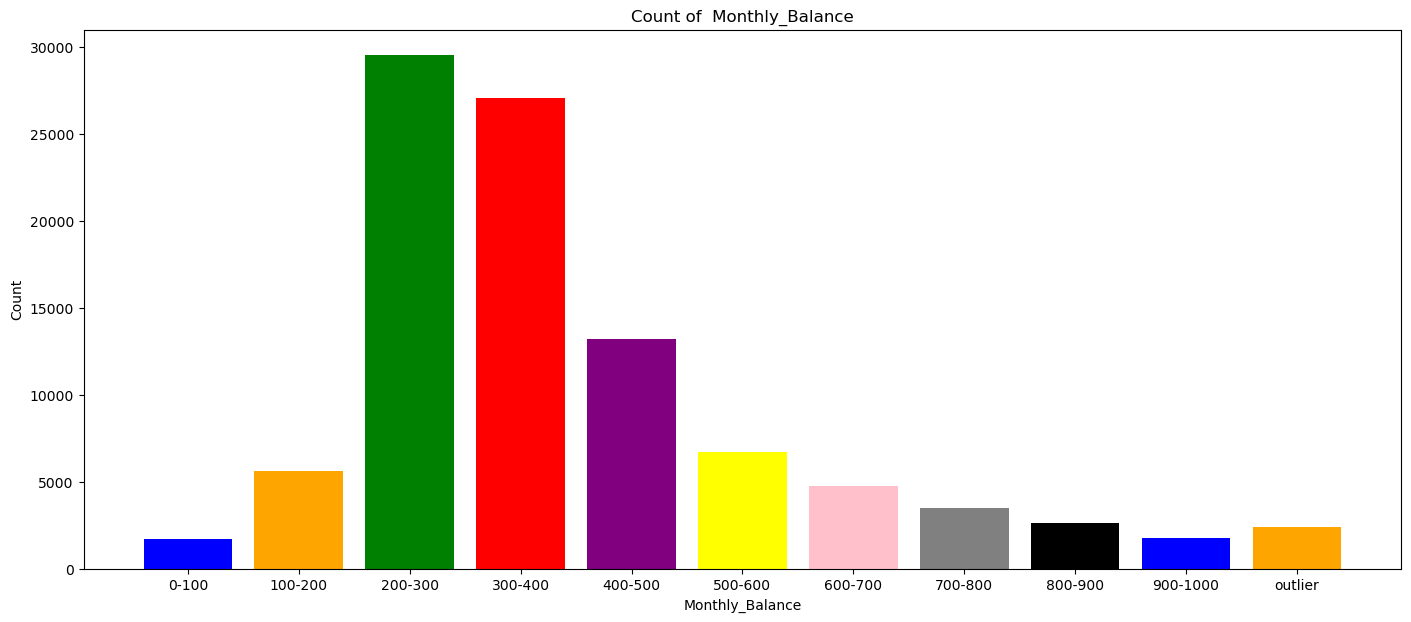

In [ ]:
interest_max = df["Monthly_Balance"].max()
interest_min = df["Monthly_Balance"].min()
bin_edges = [interest_min-1, 100, 200,300, 400, 500,600, 700,800,900,1000,interest_max]
bin_labels = ["0-100", "100-200", "200-300", "300-400", "400-500", "500-600", "600-700","700-800","800-900","900-1000","outlier"]
df['Interest_Rate_count'] = pd.cut(df['Monthly_Balance'], bins=bin_edges, labels=bin_labels)
num_interest_counts = df['Interest_Rate_count'].value_counts().sort_index()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink', 'gray', 'black']
figure = plt.figure(figsize=(17, 7))
plt.bar(num_interest_counts.index, num_interest_counts.values, color=colors)
plt.xlabel('Monthly_Balance')
plt.ylabel('Count')
plt.title("Count of  Monthly_Balance")
plt.show()

In [ ]:
winsorized_Dd= winsorize(df["Monthly_Balance"],limits=[None, 0.05])
df["Monthly_Balance"]=winsorized_Dd

In [ ]:
imputer = KNNImputer(n_neighbors=3)
# Reshape the column data to a 2D array for imputation
imputer_inputed=df["Monthly_Balance"].values.reshape(-1, 1)
# Perform imputation
imputed_values = imputer.fit_transform(imputer_inputed)
# Update the DataFrame with the imputed values
df["Monthly_Balance"]= imputed_values

# Credit_History_Age filling missing values with KNN

In [ ]:
total_duration = []
for i in df["Credit_History_Age"]:
    if pd.isnull(i):
        total_duration.append(np.nan)
        continue
    elif isinstance(i, str):
        years, months = i.split(" Years and ")
        months = months.split(" Months")[0]
        total_duration.append(int(years) * 12 + int(months))
    else:
        total_duration.append(np.nan)

In [ ]:
df["Credit_History_duraion"]=total_duration
df["Credit_History_duraion"]=df["Credit_History_duraion"].astype("float")

In [ ]:
imputer = KNNImputer(n_neighbors=3)
# Reshape the column data to a 2D array for imputation
imputer_inputed=df["Credit_History_duraion"].values.reshape(-1, 1)
# Perform imputation
imputed_values = imputer.fit_transform(imputer_inputed)
# Update the DataFrame with the imputed values
df["Credit_History_duraion"]= imputed_values

In [ ]:
df.drop("Credit_History_Age",axis=1,inplace=True)

In [ ]:
df.drop("Type_of_Loan",axis=1,inplace=True)

In [ ]:
df.drop("Interest_Rate_count",axis=1,inplace=True)

In [ ]:
df.drop("Age Group",axis=1,inplace=True)

In [ ]:
df.drop("num_credict card",axis=1,inplace=True)

In [ ]:
df.drop("num_bank_acc",axis=1,inplace=True)

# importing parcital cleaned data

In [ ]:
df.to_csv(r"C:\Users\91779\OneDrive\Desktop\csv files\Credit.csv",index=False)

In [ ]:
score=pd.read_csv(r"C:\Users\91779\OneDrive\Desktop\csv files\Credit.csv")
score.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_duraion
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265.000000
1,CUS_0xd40,February,23,Scientist,19114.12,4194.170850,3,4,3,4,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,221.195405
2,CUS_0xd40,March,38,Scientist,19114.12,4194.170850,3,4,3,4,...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267.000000
3,CUS_0xd40,April,23,Scientist,19114.12,4194.170850,3,4,3,4,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268.000000
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269.000000


In [ ]:
score["Occupation"]=score["Occupation"].str.replace('_______',"unknown")

# Found some missing values in Feature

In [ ]:
score["Credit_Mix"].value_counts(),score["Credit_Mix"].unique()

(Credit_Mix
 Standard    36479
 Good        24337
 _           20195
 Bad         18989
 Name: count, dtype: int64,
 array(['_', 'Good', 'Standard', 'Bad'], dtype=object))

 # Need to fill missing values in Credit Mix

In [ ]:
credict_test=score.loc[score["Credit_Mix"]=='_']
#credict_test # The data given to test by using best algorithm

In [ ]:
t_data=score.loc[score["Credit_Mix"]!='_']
t_data.drop("Customer_ID",axis=1,inplace=True)

C:\Users\91779\AppData\Local\Temp\ipykernel_22708\2501410683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_data.drop("Customer_ID",axis=1,inplace=True)


# Feature Engineering

In [ ]:
def dup_columns(data, dup_ratio=0.99):
    """
    Takes data and Returns Duplicate columns,
    Uses Duplicate ratio, if more than this considers as duplicates
    """
    dup_cols = []
    cols_seen = []
    for col in data.columns:
        for col2 in data.columns:
            if col==col2 or col in dup_cols:
                continue
            else:
                cols_seen.append(col)
                if data.loc[data[col]==data[col2]].shape[0]>data.shape[0]*dup_ratio:
                    dup_cols.append(col2)
    return list(set(dup_cols))

In [ ]:
dup_columns(t_data,0.98)

[]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(t_data.drop("Credit_Mix", axis=1),
                                                    t_data["Credit_Mix"],
                                                    test_size=0.25,
                                                    random_state=35)

In [ ]:
X_train_obj=X_train.select_dtypes("object")
from sklearn.preprocessing import OneHotEncoder
oe=OneHotEncoder(drop='first',sparse=False)
X_train_obj_oe=pd.DataFrame(oe.fit_transform(X_train_obj),index=X_train_obj.index,\
                            columns=oe.get_feature_names_out(X_train_obj.columns))
X_train_num=X_train.select_dtypes("number")
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_num_sc=pd.DataFrame(sc.fit_transform(X_train_num),index=X_train_num.index,\
                           columns=X_train_num.columns)
X_train_process=X_train_num_sc.merge(X_train_obj_oe,left_index=True,right_index=True)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_test_obj=X_test.select_dtypes("object")
X_test_obj_oe=pd.DataFrame(oe.transform(X_test_obj),index=X_test_obj.index,\
                           columns=oe.get_feature_names_out(X_test_obj.columns))
X_test_num=X_test.select_dtypes("number")
X_test_num_sc=pd.DataFrame(sc.transform(X_test_num),index=X_test_num.index,\
                          columns=X_test_num.columns)
X_test_process=X_test_num_sc.merge(X_test_obj_oe,left_index=True,right_index=True)

# Emdedded Methods finding the best Features

In [ ]:
from sklearn.feature_selection import SelectFromModel
sm = SelectFromModel(estimator=RandomForestClassifier(max_depth=5), max_features=16)
sm.fit(X_train_process,y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=5), max_features=16)

In [ ]:
cols_use =X_train_process.columns[sm.get_support()]
cols_use.tolist()

['Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Payment_of_Min_Amount_No',
 'Payment_of_Min_Amount_Yes',
 'Credit_Score_Standard']

In [ ]:
cri=score.copy()
columns_to_drop=['Age',
 'Payment_Behaviour',
 'Monthly_Inhand_Salary',
 'Month',
 'Credit_Mix',
 'Occupation',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Annual_Income',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Credit_Utilization_Ratio',
 'Credit_Score']
cri.drop(columns_to_drop,axis=1,inplace=True)

In [ ]:
# THESE ARE THE BEST FEATURES IN DATAS AS PER TRAGET COLUMN AS
cri.columns

Index(['Customer_ID', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_History_duraion'],
      dtype='object')

# buliding model to fill Missing  value in Credit_Mix feature

In [ ]:
column_to_add = score['Credit_Mix']
# Concatenate 'cr' and the extracted column along the columns axis
cri= pd.concat([cri, column_to_add], axis=1)

In [ ]:
cri=cri.loc[score["Credit_Mix"]!='_']
cri.drop("Customer_ID",axis=1,inplace=True)

In [ ]:
#Need to train the data
X_train,X_test,y_train,y_test=train_test_split(cri.drop("Credit_Mix", axis=1),
                                                    cri["Credit_Mix"],
                                                    test_size=0.25,
                                                    random_state=35)


In [ ]:
X_train_obj=X_train.select_dtypes("object")
from sklearn.preprocessing import OneHotEncoder
oe=OneHotEncoder(drop='first',sparse=False)
X_train_obj_oe=pd.DataFrame(oe.fit_transform(X_train_obj),index=X_train_obj.index,\
                            columns=oe.get_feature_names_out(X_train_obj.columns))
X_train_num=X_train.select_dtypes("number")
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_num_sc=pd.DataFrame(sc.fit_transform(X_train_num),index=X_train_num.index,\
                           columns=X_train_num.columns)
X_train_process=X_train_num_sc.merge(X_train_obj_oe,left_index=True,right_index=True)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_test_obj=X_test.select_dtypes("object")
X_test_obj_oe=pd.DataFrame(oe.transform(X_test_obj),index=X_test_obj.index,\
                           columns=oe.get_feature_names_out(X_test_obj.columns))
X_test_num=X_test.select_dtypes("number")
X_test_num_sc=pd.DataFrame(sc.transform(X_test_num),index=X_test_num.index,\
                          columns=X_test_num.columns)
X_test_process=X_test_num_sc.merge(X_test_obj_oe,left_index=True,right_index=True)

# RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_process,y_train)
y_pred = rf_classifier.predict(X_test_process)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred,average=None)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred,average=None)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred,average=None)
print("F1-score:", f1)

Accuracy: 0.9779971932638332
Precision: [0.9840249  0.9805173  0.97319677]
Recall: [0.99039465 0.96687645 0.97884932]
F1-score: [0.9871995  0.9736491  0.97601486]


In [ ]:
train_score=rf_classifier.score(X_train_process,y_train)
test_score=rf_classifier.score(X_test_process,y_test)
train_score,test_score

(1.0, 0.9779971932638332)

# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_process,y_train)
y_preddc=dt.predict(X_test_process)

In [ ]:
accuracy = accuracy_score(y_test, y_preddc)
print("Accuracy:", accuracy)
# Calculate precision
precision = precision_score(y_test, y_preddc,average=None)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_preddc,average=None)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_preddc,average=None)
print("F1-score:", f1)

Accuracy: 0.9551924619085806
Precision: [0.96440397 0.95321345 0.9516129 ]
Recall: [0.97306327 0.94816164 0.95046575]
F1-score: [0.96871427 0.95068084 0.95103898]


In [ ]:
train_score=dt.score(X_train_process,y_train)
test_score=dt.score(X_test_process,y_test)
train_score,test_score

(1.0, 0.9551924619085806)

   ## WORKING ON UNSEEN TEST DATA WITHOUT REAL-VALUES

In [ ]:
columns_to_drop=['Age',
 'Payment_Behaviour',
 'Monthly_Inhand_Salary',
 'Month',
 'Occupation',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Annual_Income',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Credit_Utilization_Ratio',
 'Credit_Score']
credict_test.drop(columns_to_drop,axis=1,inplace=True)
credict_test.drop("Credit_Mix",axis=1,inplace=True,)

C:\Users\91779\AppData\Local\Temp\ipykernel_22708\2928979643.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credict_test.drop(columns_to_drop,axis=1,inplace=True)
C:\Users\91779\AppData\Local\Temp\ipykernel_22708\2928979643.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credict_test.drop("Credit_Mix",axis=1,inplace=True,)


In [ ]:
credict_test.drop("Customer_ID",axis=1,inplace=True,)

C:\Users\91779\AppData\Local\Temp\ipykernel_22708\3373797207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credict_test.drop("Customer_ID",axis=1,inplace=True,)


In [ ]:
X_test_num=credict_test.select_dtypes("number")
X_test_obj=credict_test.select_dtypes("object")
X_test_obj_oe=pd.DataFrame(oe.transform(X_test_obj),index=X_test_obj.index,\
                           columns=oe.get_feature_names_out(X_test_obj.columns))
X_test_num_sc=pd.DataFrame(sc.transform(X_test_num),index=X_test_num.index,\
                          columns=X_test_num.columns)
X_test_process=X_test_num_sc.merge(X_test_obj_oe,left_index=True,right_index=True)

In [ ]:
y_preddc=dt.predict(X_test_process)

In [ ]:
y_pred_column = pd.DataFrame(y_preddc, columns=['Predicted_Credit_Mix'])

In [ ]:
y_pred_column

,Predicted_Credit_Mix
0,Good
1,Good
2,Good
3,Good
4,Standard
...,...
20190,Bad
20191,Good
20192,Good
20193,Good


In [ ]:
fill=score.loc[score["Credit_Mix"]!='_']
fill.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit_History_duraion'],
      dtype='object')

In [ ]:
up=score.loc[score["Credit_Mix"]=='_']
up.drop("Credit_Mix",axis=1,inplace=True)

C:\Users\91779\AppData\Local\Temp\ipykernel_22708\3417408043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up.drop("Credit_Mix",axis=1,inplace=True)


In [ ]:
fill.shape,up.shape

((79805, 24), (20195, 23))

In [ ]:
up.reset_index(drop=True, inplace=True)
up["Credit_Mix"] = y_pred_column['Predicted_Credit_Mix']

C:\Users\91779\AppData\Local\Temp\ipykernel_22708\2764421041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up["Credit_Mix"] = y_pred_column['Predicted_Credit_Mix']


In [ ]:
fill.shape,up.shape

((79805, 24), (20195, 24))

In [ ]:
column_order = ['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit_History_duraion']  # Specify the desired column order

# Reindex both DataFrames based on the column order
df1_reindexed = fill.reindex(columns=column_order)
df2_reindexed = up.reindex(columns=column_order)

# Concatenate the reindexed DataFrames along the columns
concatenated_df = pd.concat([df1_reindexed, df2_reindexed], axis=0)

# Display the concatenated DataFrame with ordered columns
concatenated_df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_duraion
1,February,23,Scientist,19114.12,4194.170850,3,4,3,4,0.0,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,221.195405
2,March,38,Scientist,19114.12,4194.170850,3,4,3,4,3.0,...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267.000000
3,April,23,Scientist,19114.12,4194.170850,3,4,3,4,5.0,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268.000000
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6.0,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269.000000
5,June,23,Scientist,19114.12,4194.170850,3,4,3,4,8.0,...,Good,809.98,27.262259,No,49.574949,62.430172,!@9#%8,340.479212,Good,270.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190,May,28,Architect,20002.88,1929.906667,10,8,29,5,33.0,...,Bad,3571.70,28.508250,Yes,60.964772,213.978010,Low_spent_Small_value_payments,208.047884,Standard,72.000000
20191,January,24,Mechanic,39628.99,3359.415833,4,6,7,2,23.0,...,Good,502.38,32.991333,No,35.104023,401.196481,Low_spent_Small_value_payments,189.641080,Poor,375.000000
20192,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,20.0,...,Good,502.38,39.323569,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor,377.000000
20193,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23.0,...,Good,502.38,34.663572,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,378.000000


 # cleaned data

In [ ]:
concatenated_df.to_csv(r"C:\Users\91779\OneDrive\Desktop\csv files\ak.csv")

In [ ]:
data1=pd.read_csv(r"C:\Users\91779\OneDrive\Desktop\csv files\ak.csv")
data1.drop("Unnamed: 0",axis=1,inplace=True)
data1['Customer_ID']=customer

In [ ]:
train_occupation = data1.groupby(['Customer_ID'])['Occupation'].apply(mode,keepdims=False).reset_index()
train_occupation['Occupation'] = train_occupation['Occupation'].apply(lambda x:x.mode)

In [ ]:
cust_IDs = train_occupation[train_occupation['Occupation']=='unknown']['Customer_ID'].values.tolist()

In [ ]:
cust_IDS_occ = {}
for c_id in cust_IDs:
    if c_id=='CUS_0x9e67':
        occ = 'Media_Manager'
    else:
        occ =data1[data1['Customer_ID']==c_id]['Occupation'].mode().values[0]
    cust_IDS_occ[c_id] = [occ]

In [ ]:
cust_ID_occ_df = pd.DataFrame(cust_IDS_occ).T.reset_index()

In [ ]:
cust_ID_occ_df.columns = ['Customer_ID','OCC_2']

In [ ]:
train_occupation.rename(columns={'Occupation':'OCC_1'}, inplace=True)
train_data_o = pd.merge(data1, train_occupation, on='Customer_ID', how='left')
train_data_o = pd.merge(train_data_o, cust_ID_occ_df, on='Customer_ID', how='left' )

In [ ]:
train_data_o['Occupation_filled'] = np.where(train_data_o['Occupation']=='unknown',train_data_o['OCC_1'], train_data_o['Occupation'])
train_data_o['Occupation_filled'] = np.where(train_data_o['Occupation_filled']=='unknown',train_data_o['OCC_2'], train_data_o['Occupation_filled'])

In [ ]:
data1[data1['Customer_ID']=='CUS_0xc2a1']['Occupation'].mode().values[0]

'Engineer'

In [ ]:
data1["Occupation"].value_counts()

Occupation
unknown          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [ ]:
data1["Occupation"]=train_data_o['Occupation_filled']
data1["Occupation"].value_counts()

Occupation
Lawyer           7084
Engineer         6825
Architect        6796
Scientist        6775
Mechanic         6775
Accountant       6751
Developer        6704
Media_Manager    6693
Teacher          6654
Entrepreneur     6643
Doctor           6592
Journalist       6530
Manager          6423
Writer           6328
Musician         6295
unknown           132
Name: count, dtype: int64

# Exploratory Data Analysis

In [ ]:
skim(data1)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 100000 │ │ float64     │ 12    │                                                          │
│ │ Number of columns │ 24     │ │ string      │ 7     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0       ┃ p25    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Age                      │   0 │      0 │      33 │     11 │       14 │     25 │     41 │      56 │ ▅▇▇█▅▃ │  │
│ │ Annual_Income            │   0 │      0 │   51000 │  37000 │     7000 │  19000 │  73000 │  130000 │ █▆▃▂▁▂ │  │
│ │ Monthly_Inhand_Salar     │   0 │      0 │    4200 │   2900 │      300 │   1800 │   5400 │   15000 │ ██▃▁▁  │  │
│ │ Num_Bank_Accounts        │   0 │      0 │     5.4 │    2.6 │        0 │      3 │      7 │      11 │ ▃▅▇█▅▂ │  │
│ │ Num_Credit_Card          │   0 │      0 │     5.6 │    2.1 │        1 │      4 │      7 │      10 │ ▁▃█▄▅▃ │  │
│ │ Interest_Rate            │   0 │      0 │      15 │    9.1 │        1 │      8 │     20 │      34 │ ▇█▇▅▃▄ │  │
│ │ Num_of_Loan              │   0 │      0 │     3.4 │    2.4 │        0 │      1 │      5 │       8 │ █▅▅▇▂▅ │  │
│ │ Delay_from_due_date      │   0 │      0 │      21 │     14 │        0 │     10 │     28 │      54 │ ▆█▆▄▁▃ │  │
│ │ Num_of_Delayed_Payme     │   0 │      0 │      31 │    220 │        0 │      9 │     19 │    4400 │   █    │  │
│ │ Changed_Credit_Limit     │   0 │      0 │      11 │    6.9 │        0 │    5.4 │     15 │      26 │ ▆██▄▃▃ │  │
│ │ Num_Credit_Inquiries     │   0 │      0 │     6.1 │    4.1 │        0 │      3 │      9 │      15 │ █▇█▅▅▃ │  │
│ │ Outstanding_Debt         │   0 │      0 │    1400 │   1100 │     0.23 │    570 │   1900 │    4100 │ ██▄▃▁▂ │  │
│ │ Credit_Utilization_R     │   0 │      0 │      32 │    5.1 │       20 │     28 │     36 │      50 │ ▂███▂  │  │
│ │ Total_EMI_per_month      │   0 │      0 │     880 │   4600 │        0 │     30 │    160 │   30000 │   █    │  │
│ │ Amount_invested_mont     │   0 │      0 │    1100 │   2800 │        0 │     77 │    300 │   10000 │ █    ▁ │  │
│ │ Monthly_Balance          │   0 │      0 │     400 │    200 │   0.0078 │    270 │    480 │     920 │ ▁██▃▁▂ │  │
│ │ Credit_History_durai     │   0 │      0 │     220 │     95 │        1 │    150 │    290 │     400 │ ▁▄▅█▄▄ │  │
│ └──────────────────────────┴─────┴────────┴─────────┴────────┴──────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━

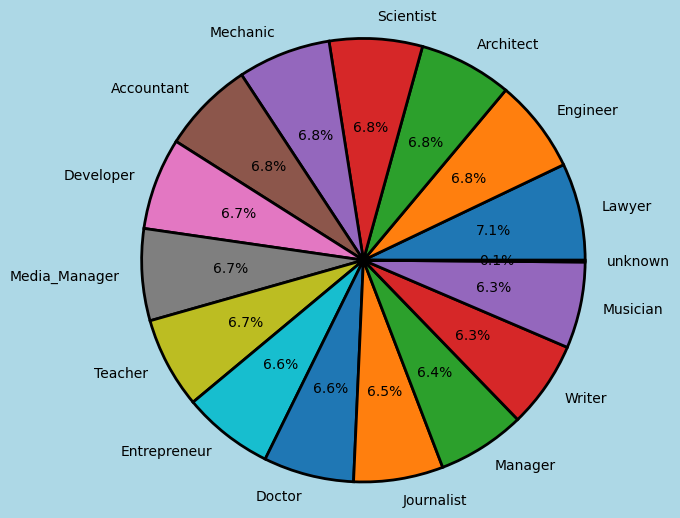

In [ ]:
values = data1["Occupation"].value_counts()
labels=values.index.tolist()
wedgeprops = {"linewidth":2, "edgecolor": "black"}
fig = plt.figure(facecolor='lightblue')
plt.pie(values, labels=labels, autopct='%1.1f%%',radius=1.5,wedgeprops=wedgeprops)
plt.title("", fontsize=14, fontweight="bold")
plt.tick_params(labelsize=8)
plt.show()

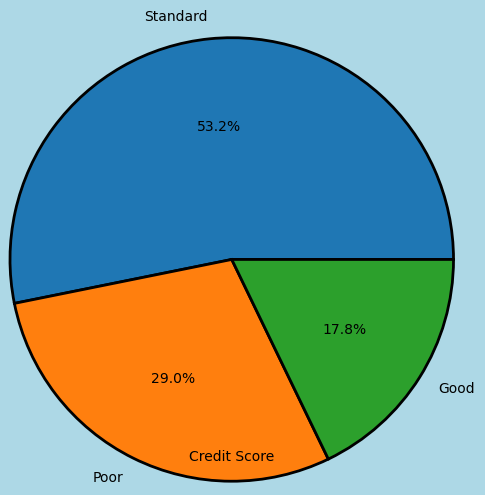

In [ ]:
import matplotlib.pyplot as plt

values = data["Credit_Score"].value_counts()
labels = values.index.tolist()

explode = [0.1 if label == "Lifted" else 0 for label in labels]

fig = plt.figure(facecolor="lightblue")

wedgeprops = {"linewidth": 2, "edgecolor": "black"}
plt.pie(values, labels=labels, autopct="%1.1f%%", radius=1.5, wedgeprops=wedgeprops)

plt.title("", fontsize=14, fontweight="bold")
plt.tick_params(labelsize=8)
plt.xlabel("Credit Score")
plt.show()

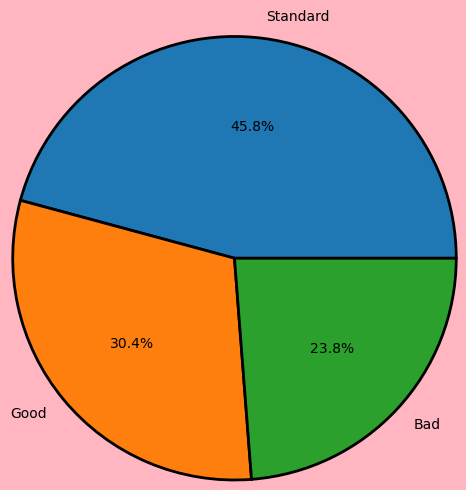

In [ ]:
values = data1["Credit_Mix"].value_counts()
labels=values.index.tolist()
wedgeprops = {"linewidth":2, "edgecolor": "black"}
fig = plt.figure(facecolor='lightpink')
plt.pie(values, labels=labels, autopct='%1.1f%%',radius=1.5,wedgeprops=wedgeprops)
plt.title("", fontsize=14, fontweight="bold")
plt.tick_params(labelsize=8)
plt.show()

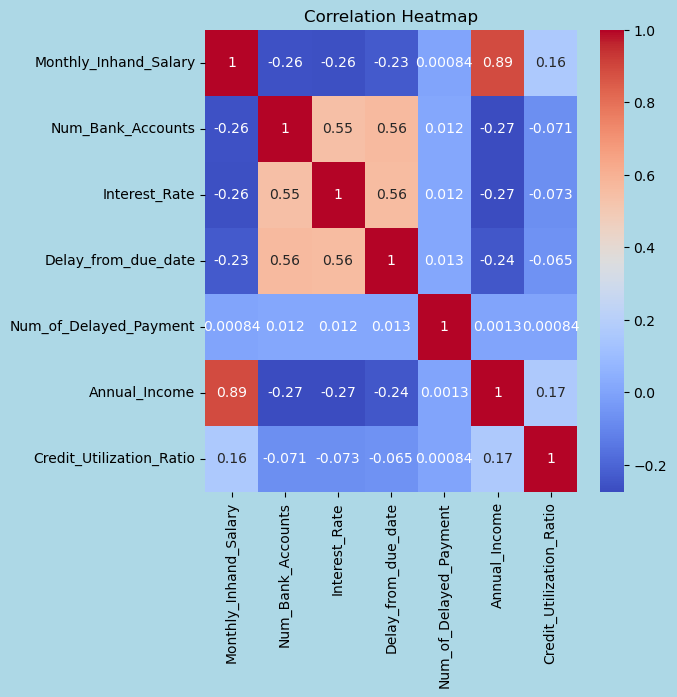

In [ ]:
columns=['Monthly_Inhand_Salary','Num_Bank_Accounts','Interest_Rate','Delay_from_due_date','Num_of_Delayed_Payment',
        "Annual_Income",'Credit_Utilization_Ratio']
coluimns=data1[columns]
igure=plt.figure(facecolor="lightblue",figsize=(6,6))
corr_matrix =coluimns.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

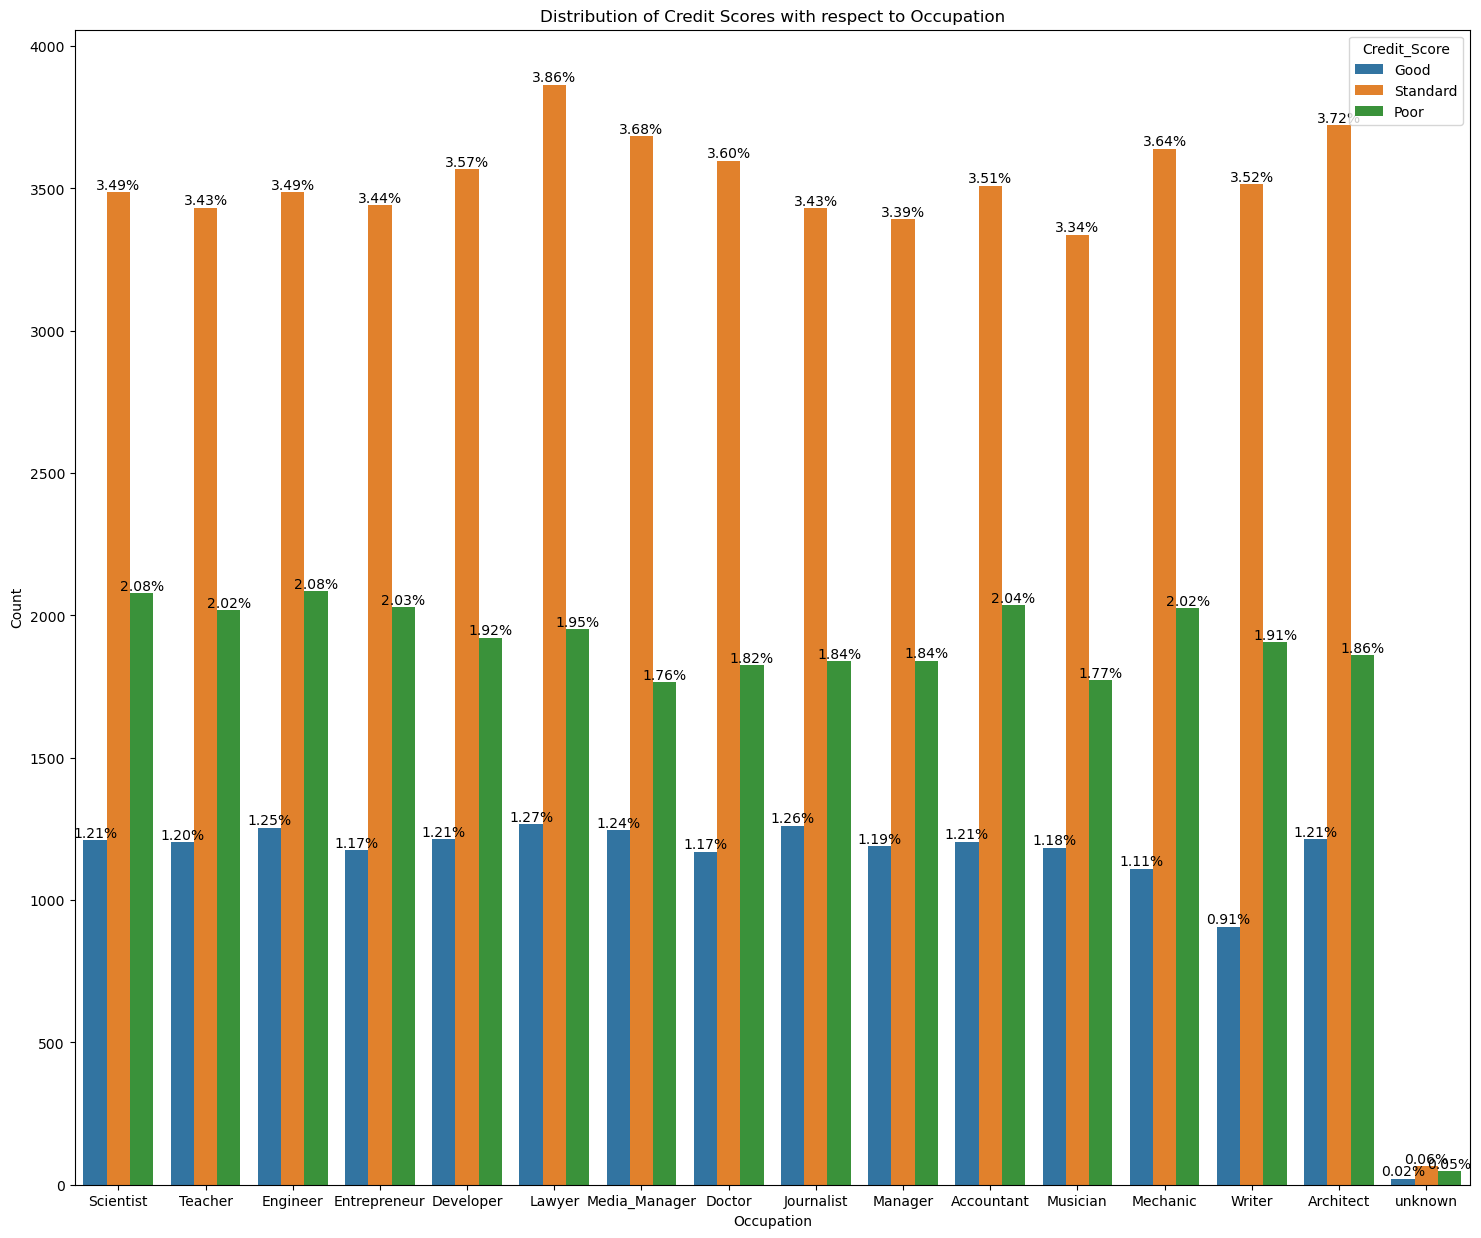

In [ ]:
figure = plt.figure(figsize=(18, 15))
total_count = len(data1)  # Total count for calculating percentages
ax = sns.countplot(data=data1, x='Occupation', hue='Credit_Score')

# Adding percentages to the plot
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total_count) * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Adding labels and titles
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores with respect to Occupation')

# Display the plot
plt.show()


<Axes: xlabel='Num_Credit_Card', ylabel='Credit_Utilization_Ratio'>

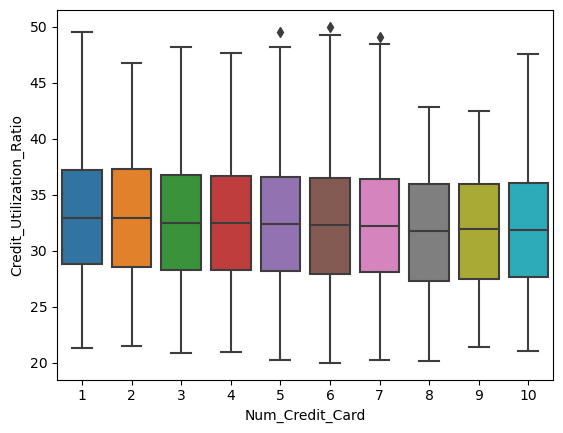

In [ ]:
sns.boxplot(x=data1['Num_Credit_Card'],y=data1['Credit_Utilization_Ratio'])

<Axes: xlabel='Num_Credit_Card', ylabel='Credit_Utilization_Ratio'>

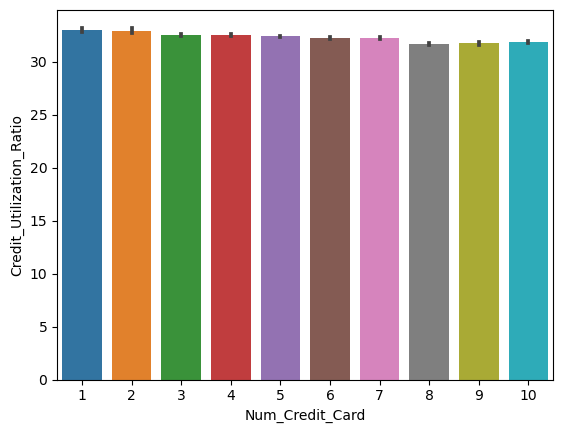

In [ ]:
sns.barplot(x=data1['Num_Credit_Card'],y=data1['Credit_Utilization_Ratio'])

In [ ]:
data1[data1["Credit_Utilization_Ratio"]>30]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_duraion,Customer_ID
0,February,23,Scientist,19114.12,4194.170850,3,4,3,4,0.0,...,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,221.195405,CUS_0xd40
2,April,23,Scientist,19114.12,4194.170850,3,4,3,4,5.0,...,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268.000000,CUS_0xd40
8,February,28,Teacher,34847.84,3037.986667,2,4,6,1,7.0,...,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320.000000,CUS_0x21b1
9,April,28,Teacher,34847.84,4194.170850,2,4,6,1,3.0,...,605.03,39.182656,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good,322.000000,CUS_0x21b1
10,May,28,Teacher,34847.84,3037.986667,2,4,6,1,3.0,...,605.03,34.977895,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good,323.000000,CUS_0x21b1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,April,28,Architect,20002.88,1929.906667,10,8,29,0,33.0,...,3571.70,30.614953,Yes,60.964772,43.724617,High_spent_Large_value_payments,328.301277,Standard,71.000000,CUS_0x942c
99996,January,24,Mechanic,39628.99,3359.415833,4,6,7,2,23.0,...,502.38,32.991333,No,35.104023,401.196481,Low_spent_Small_value_payments,189.641080,Poor,375.000000,CUS_0x942c
99997,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,20.0,...,502.38,39.323569,No,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor,377.000000,CUS_0x942c
99998,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23.0,...,502.38,34.663572,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,378.000000,CUS_0x942c


C:\Users\91779\AppData\Local\Temp\ipykernel_22708\1816766696.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a=data1["Credit_Utilization_Ratio"], hist=True, kde=True, rug=True,color=color )


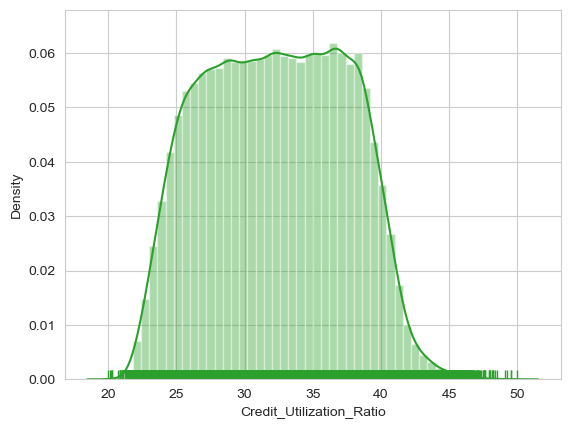

In [ ]:
sns.set_style("whitegrid")
default_palette = sns.color_palette()
color=default_palette[2]
sns.distplot( a=data1["Credit_Utilization_Ratio"], hist=True, kde=True, rug=True,color=color )
plt.show()

In [ ]:
grouped_data= data1.groupby('Credit_Score')['Credit_Utilization_Ratio'].mean()
# Display the grouped data
print(grouped_data)

Credit_Score
Good        32.686107
Poor        31.986146
Standard    32.313820
Name: Credit_Utilization_Ratio, dtype: float64


In [ ]:
score_grp=data1.groupby("Credit_Score")

In [ ]:
score_grp[["Annual_Income","Monthly_Inhand_Salary","Delay_from_due_date",
           "Credit_History_duraion","Outstanding_Debt","Credit_Utilization_Ratio"]].mean()

,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Credit_History_duraion,Outstanding_Debt,Credit_Utilization_Ratio
Credit_Score,,,,,,
Good,63957.706817,5204.367858,10.919565,279.065427,797.744944,32.686107
Poor,41017.156173,3498.346691,29.252742,174.519775,2043.129449,31.986146
Standard,51284.322348,4234.937327,19.623688,227.247106,1256.576135,32.313820


In [ ]:
contingency_table = pd.crosstab(data1["Credit_Score"],data1["Credit_Mix"], margins=True)
contingency_table

Credit_Mix,Bad,Good,Standard,All
Credit_Score,,,,
Good,350,14743,2735,17828
Poor,14284,4809,9905,28998
Standard,9141,10877,33156,53174
All,23775,30429,45796,100000


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
#h0 is consider both columms are independent
#h1 is both columns are dependent
# Assuming 'column1' and 'column2' are the two columns of interest in your DataFrame
observed = pd.crosstab(data1['Credit_Score'], data['Credit_Mix'])

chi2, p_value, _, _ = chi2_contingency(observed)

alpha = 0.05  # significance level

if p_value < alpha:
    print("ho is rejected the colums are dependent",p_value)
else:
    print("failed to rejected the h0 so the columns are independent",p_value)
    #we can remove the Credit_Mix column

failed to rejected the h0 so the columns are independent 0.1850126040541475


In [ ]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.450160,10.646596,14.000000,25.000000,34.000000,41.000000,56.000000
Annual_Income,100000.0,50566.460484,37019.045962,7005.930000,19457.500000,37578.610000,72790.920000,134533.320000
Monthly_Inhand_Salary,100000.0,4194.170850,2935.176493,303.645417,1792.084167,3852.736667,5371.525000,15204.633333
Num_Bank_Accounts,100000.0,5.377410,2.576094,0.000000,3.000000,6.000000,7.000000,11.000000
Num_Credit_Card,100000.0,5.635050,2.147912,1.000000,4.000000,5.000000,7.000000,10.000000
Interest_Rate,100000.0,14.927590,9.076456,1.000000,8.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.380850,2.432279,0.000000,1.000000,3.000000,5.000000,8.000000
Delay_from_due_date,100000.0,20.864150,14.300050,0.000000,10.000000,18.000000,28.000000,54.000000
Num_of_Delayed_Payment,100000.0,30.934805,217.973276,0.000000,9.000000,15.000000,19.000000,4397.000000
Changed_Credit_Limit,100000.0,10.688073,6.853276,0.000000,5.420000,9.560000,15.360000,26.030000


In [ ]:
data1.loc[data1["Payment_Behaviour"]=="!@9#%8","Payment_Behaviour"]=np.nan
data1["Payment_Behaviour"]=data1["Payment_Behaviour"].ffill()

In [ ]:
map_dict = {'Low_spent_Small_value_payments':'LSSV','High_spent_Medium_value_payments':'HSMV','High_spent_Large_value_payments':'HSLV',\
           'Low_spent_Medium_value_payments':'LSMV','High_spent_Small_value_payments':'HSSV','Low_spent_Large_value_payments':'LSLV'}
data1['Payment_Behaviour'] =data1['Payment_Behaviour'].map(map_dict)

# BUILDING THE MODEL

In [ ]:
from sklearn import set_config
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV

set_config(transform_output='pandas')
X_train,X_test,y_train,y_test=train_test_split(data1.drop(['Credit_Mix','Credit_Score','Customer_ID'],axis=1)\
                                               ,data1["Credit_Score"],test_size=0.3,random_state=23)

In [ ]:
X_train_num=X_train.select_dtypes("number")
X_train_cat=X_train.select_dtypes("object")
X_test_num=X_test.select_dtypes("number")
X_test_cat=X_test.select_dtypes("object")

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
oe=OneHotEncoder(drop="first",sparse=False)
sc=StandardScaler()
x_train_num_processed = sc.fit_transform(X_train_num)
x_train_cat_processed= oe.fit_transform(X_train_cat)
x_test_num_processed = sc.transform(X_test_num)
x_test_cat_processed = oe.transform(X_test_cat)

In [ ]:
x_train_processed = pd.merge(x_train_num_processed, x_train_cat_processed, left_index=True, right_index=True, how='inner')
x_test_processed = pd.merge(x_test_num_processed, x_test_cat_processed, left_index=True, right_index=True, how='inner')

In [ ]:
from sklearn.feature_selection import  SelectFromModel
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForesrClassifier
rf_select = SelectFromModel(RandomForestClassifier(n_estimators=55, max_depth=4), max_features=20)
x_train_rf_selected = rf_select.fit_transform(x_train_processed,y_train)
x_test_rf_selected = rf_select.transform(x_test_processed)

# Metrics

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix,precision_score,classification_report
def metric(real,predict):
    acc=accuracy_score(real,predict)
    rec=recall_score(real,predict,average="weighted")
    f1=f1_score(real,predict,average="weighted")
    #conmax=confusion_matrix(real,predict)
    pre=precision_score(real,predict,average="weighted")
    clas=classification_report(real,predict)
    print("Accuracy =",acc)
    print("Recall =",rec)
    print("Precision =",pre)
    print("F-score =",f1)
    print(clas)

# Testing the Train score and Test score

In [ ]:
def score(x_train,y_train,x_test,y_test,model):
    Train_Accuracy=model.score(x_train,y_train)
    Test_Accuracy=model.score(x_test,y_test)
    print("Train Accuracy is defind is = ",Train_Accuracy)
    print("Test Accuracy is defind as  = ",Test_Accuracy)

# RANDOM FOREST CLASSIFIER

In [ ]:
RD=RandomForestClassifier(n_estimators=100,class_weight="balanced",max_depth=17,n_jobs=-1)
RD.fit(x_train_rf_selected,y_train)
y_pred_RD=RD.predict(x_test_rf_selected)

In [ ]:
metric(y_test,y_pred_RD)

Accuracy = 0.7447333333333334
Recall = 0.7447333333333334
Precision = 0.7662254087752539
F-score = 0.7484501037193583
              precision    recall  f1-score   support

        Good       0.56      0.79      0.66      5416
        Poor       0.75      0.80      0.78      8573
    Standard       0.84      0.70      0.76     16011

    accuracy                           0.74     30000
   macro avg       0.72      0.76      0.73     30000
weighted avg       0.77      0.74      0.75     30000



In [ ]:
score(x_train_rf_selected,y_train,x_test_rf_selected,y_test,RD)

Train Accuracy is defind is =  0.8519428571428571
Test Accuracy is defind as  =  0.7443666666666666


In [ ]:
param_grid = {'n_estimators':[100,200,300],
    'max_depth': [10,11,12],
    'class_weight': ["balanced",{"poor":2,"Good":3,"Standard":1}]
}
grid_search=GridSearchCV(RD,param_grid, scoring='accuracy', cv=5,verbose=2,n_jobs=-1)
grid_search.fit(x_train_rf_selected,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=17, n_jobs=-1),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced',
                                          {'Good': 3, 'Standard': 1,
                                           'poor': 2}],
                         'max_depth': [7, 10, 11, 12],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}


# Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [ ]:
LR.fit(x_train_rf_selected,y_train)
y_pred_LR=LR.predict(x_test_rf_selected)

In [ ]:
metric(y_pred_LR,y_test)

Accuracy = 0.6298
Recall = 0.6298
Precision = 0.65926195718557
F-score = 0.6381881663157514
              precision    recall  f1-score   support

        Good       0.42      0.56      0.48      4039
        Poor       0.52      0.64      0.57      6896
    Standard       0.76      0.64      0.70     19065

    accuracy                           0.63     30000
   macro avg       0.57      0.61      0.58     30000
weighted avg       0.66      0.63      0.64     30000



In [ ]:
score(x_train_rf_selected,y_train,x_test_rf_selected,y_test,LR)

Train Accuracy is defind is =  0.6336571428571428
Test Accuracy is defind as  =  0.6298


# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [ ]:
DT.fit(x_train_rf_selected,y_train)
y_pred_DT=DT.predict(x_test_rf_selected)

In [ ]:
metric(y_pred_DT,y_test)

Accuracy = 0.7098
Recall = 0.7098
Precision = 0.7099669293456536
F-score = 0.7098801029911949
              precision    recall  f1-score   support

        Good       0.62      0.63      0.62      5365
        Poor       0.70      0.70      0.70      8606
    Standard       0.74      0.74      0.74     16029

    accuracy                           0.71     30000
   macro avg       0.69      0.69      0.69     30000
weighted avg       0.71      0.71      0.71     30000



In [ ]:
score(x_train_rf_selected,y_train,x_test_rf_selected,y_test,DT)

Train Accuracy is defind is =  0.9996285714285714
Test Accuracy is defind as  =  0.7098


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(metric='manhattan',n_neighbors=39, weights='distance')

In [ ]:
KNN.fit(x_train_rf_selected,y_train)
y_pred_KNN=KNN.predict(x_test_rf_selected)

In [ ]:
metric(y_pred_KNN,y_test)

Accuracy = 0.7542
Recall = 0.7542
Precision = 0.7578785324337268
F-score = 0.7553635935718417
              precision    recall  f1-score   support

        Good       0.64      0.70      0.67      4888
        Poor       0.74      0.77      0.75      8235
    Standard       0.80      0.76      0.78     16877

    accuracy                           0.75     30000
   macro avg       0.73      0.74      0.73     30000
weighted avg       0.76      0.75      0.76     30000



In [ ]:
score(x_train_rf_selected,y_train,x_test_rf_selected,y_test,KNN)

Train Accuracy is defind is =  0.9996428571428572
Test Accuracy is defind as  =  0.7542


In [ ]:
for i in range(3,40):
    param_grid = {
        'n_neighbors':[i],  # Try different values of k
        'weights': ['uniform', 'distance'],  # Try different weight options
        'metric': ['euclidean', 'manhattan']  # Try different distance metrics
    }
    grid_search_KNN= GridSearchCV(KNN,param_grid, cv=5, scoring='accuracy',n_jobs=-1)
    grid_search_KNN.fit(x_train_rf_selected,y_train)

In [ ]:
print(grid_search_KNN.best_params_)

{'metric': 'manhattan', 'n_neighbors': 39, 'weights': 'distance'}


# SVC

In [ ]:
from sklearn.svm import SVC
SV=SVC()

In [ ]:
SV.fit(x_train_rf_selected,y_train)
y_pred_SV=SV.predict(x_test_rf_selected)

In [ ]:
score(x_train_rf_selected,y_train,x_test_rf_selected,y_test,SV)

Train Accuracy is defind is =  0.6830857142857143
Test Accuracy is defind as  =  0.6791


In [ ]:
# Calculate the training and test scores
train_score_rf = SV.score(x_train_rf_selected,y_train)
test_score_rf = SV.score(x_test_rf_selected,y_test)
print("Training Score: {:.2f}%".format(train_score_rf * 100))
print("Test Score: {:.2f}%".format(test_score_rf * 100))
if train_score_rf > test_score_rf:
    print("The model may be overfitting the training data.")
elif train_score_rf < test_score_rf:
    print("The model may be underfitting the training data.")
else:
    print("The model appears to have a balanced fit.")

Training Score: 68.31%
Test Score: 67.91%
The model may be overfitting the training data.


# xgboost

In [ ]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 4.2 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Create an instance of the XGBoost classifier
xg_classifier=XGBClassifier(learning_rate= 0.1, max_depth= 7, n_estimators= 250, subsample= 0.8,n_jobs=-1)

# Fit the classifier on the training data
xg_classifier.fit(x_train_rf_selected, y_train_encoded)

# Predict on the test set
y_pred_encoded = xg_classifier.predict(x_test_rf_selected)

# Decode the predicted labels to original class labels
y_pred_xg= label_encoder.inverse_transform(y_pred_encoded)
y_test_encoded = label_encoder.fit_transform(y_test)


In [ ]:
score(x_train_rf_selected,y_train_encoded,x_test_rf_selected,y_test_encoded,xg_classifier)

Train Accuracy is defind is =  0.8219428571428572
Test Accuracy is defind as  =  0.754


In [ ]:
metric(y_pred_xg,y_test)

Accuracy = 0.754
Recall = 0.754
Precision = 0.7573226593364705
F-score = 0.7550953255229843
              precision    recall  f1-score   support

        Good       0.64      0.70      0.67      4939
        Poor       0.74      0.77      0.75      8254
    Standard       0.80      0.76      0.78     16807

    accuracy                           0.75     30000
   macro avg       0.73      0.74      0.73     30000
weighted avg       0.76      0.75      0.76     30000



In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200,250],
    'subsample': [0.8, 0.9, 1.0],
   }
# Perform grid search with cross-validation
grid_search=GridSearchCV(xg_classifier, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=2)
grid_search.fit(x_train_rf_selected,y_train_encoded)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 250],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [ ]:
print("Best Hyperparameters: ", grid_search.best_params_)

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 250, 'subsample': 0.8}


# CatBoostClassifier

In [ ]:
! pip install catboost
from catboost import CatBoostClassifier
CAT=CatBoostClassifier(depth=8,learning_rate= 0.1,n_estimators= 300)
CAT.fit(x_train_rf_selected,y_train)
y_pred_CAT=CAT.predict(x_test_rf_selected)

In [ ]:
metric(y_pred_CAT,y_test)

Accuracy = 0.7265666666666667
Recall = 0.7265666666666667
Precision = 0.7320649136863361
F-score = 0.7283051516375455
              precision    recall  f1-score   support

        Good       0.58      0.64      0.61      4889
        Poor       0.70      0.75      0.72      7978
    Standard       0.79      0.74      0.76     17133

    accuracy                           0.73     30000
   macro avg       0.69      0.71      0.70     30000
weighted avg       0.73      0.73      0.73     30000



In [ ]:
score(x_train_rf_selected,y_train,x_test_rf_selected,y_test,CAT)

Train Accuracy is defind is =  0.7674857142857143
Test Accuracy is defind as  =  0.7265666666666667


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8]
}
# Perform grid search
grid_search_CAT= GridSearchCV(CAT, param_grid=param_grid, cv=5,n_jobs=-1)
grid_search_CAT.fit(x_train_rf_selected,y_train)

In [ ]:
print("Best Hyperparameters: ",grid_search_CAT.best_params_)

Best Hyperparameters:  {'depth': 8, 'learning_rate': 0.1, 'n_estimators': 300}
